# Customer Segmentation

**Context**
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Importing the dataset and libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

In [6]:
plt.rcParams['figure.figsize'] = [15,8]

In [7]:
df_customer = pd.read_csv('marketing_campaign.csv', sep='\t')
df_customer.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Attributes:

#### People

- ID: Customer's unique identifier- 
Year_Birt:: Customer's birth yea
- 
Education: Customer's educati levele- l
Marital_Status: Customer's marital stat- us
Income: Customer's yearly household inc- ome
Kidhome: Number of children in customer's house- hold
Teenhome: Number of teenagers in customer's hous- ehold
Dt_Customer: Date of customer's enrollment with the c- ompany
Recency: Number of days since customer's last p- urchase
Complain: 1 if the customer complained in the last 2 years, 0 
o
#### therwise
- Products

MntWines: Amount spent on wine in l- ast 2 years
MntFruits: Amount spent on fruits in - last 2 years
MntMeatProducts: Amount spent on meat in-  last 2 years
MntFishProducts: Amount spent on fish i- n last 2 years
MntSweetProducts: Amount spent on sweets - in last 2 years
MntGoldProds: Amount spent on gold
####  in last 2- years
Promotion

NumDealsPurchases: Number of purchases m- ade with a discount
AcceptedCmp1: 1 if customer accepted th- effer in the 1st c- ampaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd - campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd-  campaign, 0 otherwise
AcceptedCmp4: 1 if customer accept t- he offer in the 4t- h campaign, 0 otherwise
AcceptedCmp5: 1 if customer acceed - the offer in the 5- th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the l
#### ast cam- paign, 0 otherwise
Place

NumWebPurchases: Number of purchases made t- hrough the company’s website
NumCatalogPurchases: Number of pur- chases made using a catalogue
NumStorePurchases: Number of pur- chases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

# EDA

In [10]:
df_customer.shape

(2240, 29)

In [11]:
df_customer.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [12]:
df_customer.duplicated().sum()

0

In [13]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conlude that:**
- There are some missing values in Income 
- Dt_Customer indicates the the date a customer joined but the database is not parsed as DateTime format

## 1) Data Cleaning

In [16]:
Total = df_customer.isnull().sum().sort_values(ascending = False)          

Percent = (df_customer.isnull().sum()*100/df_customer.isnull().count()).sort_values(ascending = False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Income                  24                      1.071429
ID                       0                      0.000000
NumDealsPurchases        0                      0.000000
Z_Revenue                0                      0.000000
Z_CostContact            0                      0.000000
Complain                 0                      0.000000
AcceptedCmp2             0                      0.000000
AcceptedCmp1             0                      0.000000
AcceptedCmp5             0                      0.000000
AcceptedCmp4             0                      0.000000
AcceptedCmp3             0                      0.000000
NumWebVisitsMonth        0                      0.000000
NumStorePurchases        0                      0.000000
NumCatalogPurchases      0                      0.000000
NumWebPurchases          0                      0.000000
MntGoldProds             0                      0.000000
Year_Birth               0                      0.000000
MntSweetProducts         0                      0.000000
MntFishProducts          0                      0.000000
MntMeatProducts          0                      0.000000
MntFruits                0                      0.000000
MntWines                 0                      0.000000
Recency                  0                      0.000000
Dt_Customer              0                      0.000000
Teenhome                 0                      0.000000
Kidhome                  0                      0.000000
Marital_Status           0                      0.000000
Education                0                      0.000000
Response                 0                      0.000000

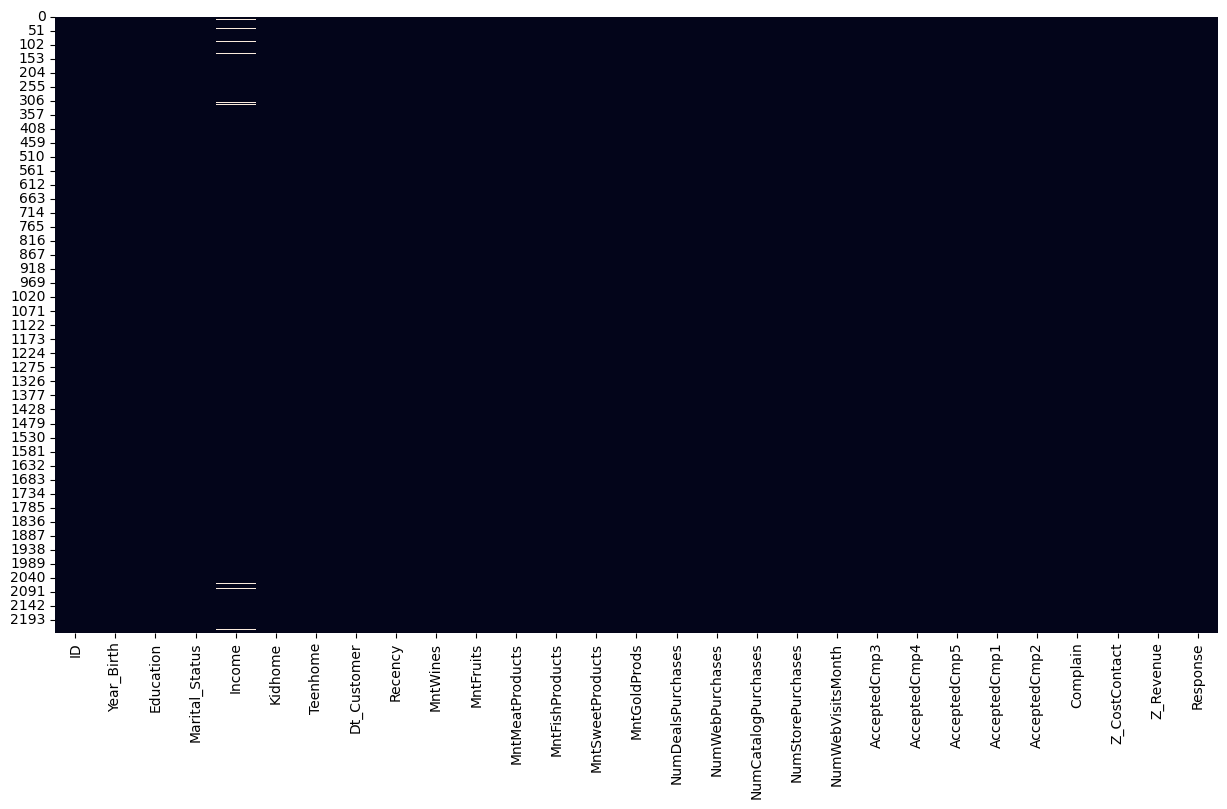

In [17]:
sns.heatmap(df_customer.isnull(), cbar= False)
plt.show()

In [18]:
# Remove the NA values 
df_customer = df_customer.dropna()
df_customer.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

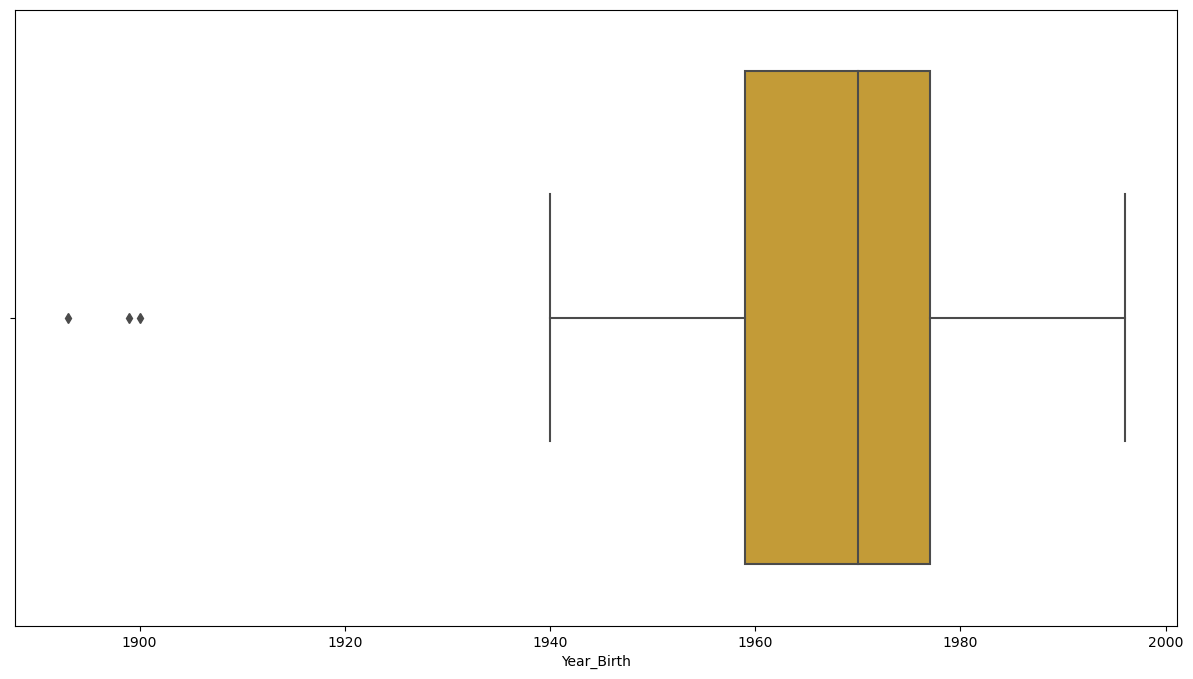

In [19]:
sns.boxplot(df_customer, x= 'Year_Birth', color= 'goldenrod')
plt.show()

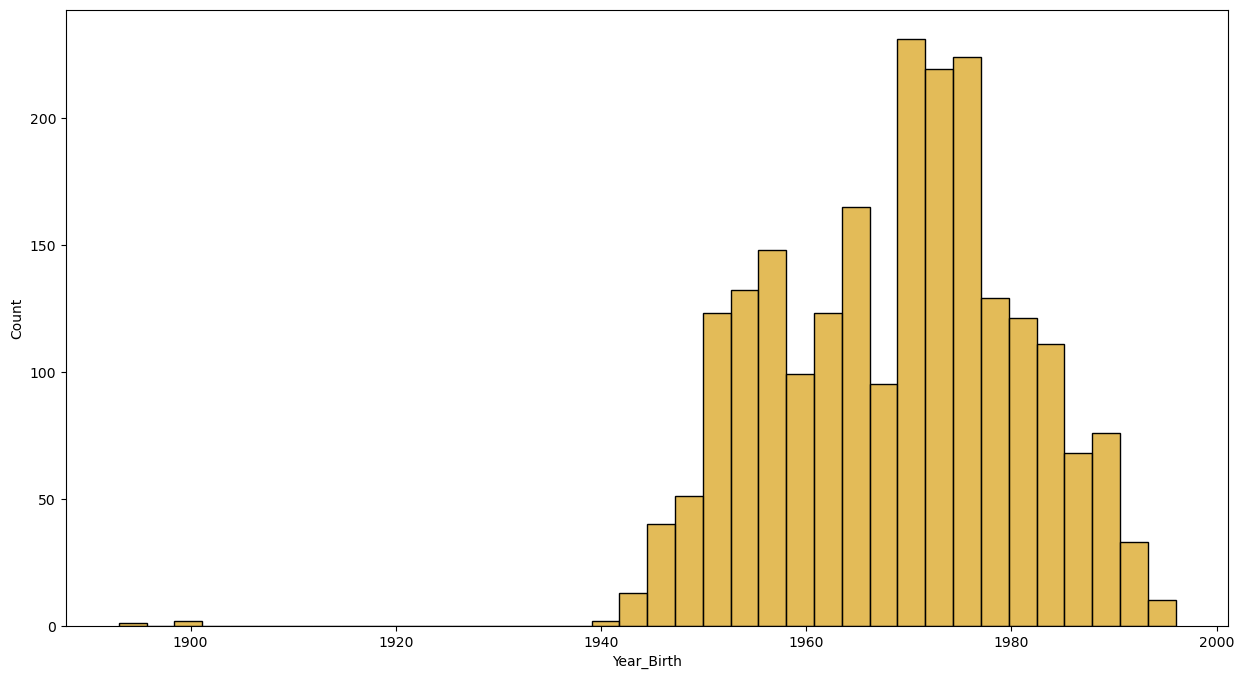

In [20]:
sns.histplot(df_customer, x= 'Year_Birth', color='goldenrod')
plt.show()

- Most of the customers were born between the 60s and 80s
- About 3 outliers were found from the 19th century, so we will drop them for better understanding

In [22]:
# calculate the Z-score for each value in column
z_scores = np.abs((df_customer['Year_Birth'] - df_customer['Year_Birth'].mean()) / df_customer['Year_Birth'].std())


# drop rows with Z-scores greater than 3
df_customer = df_customer[z_scores <= 3]

print(len(df_customer))

2213


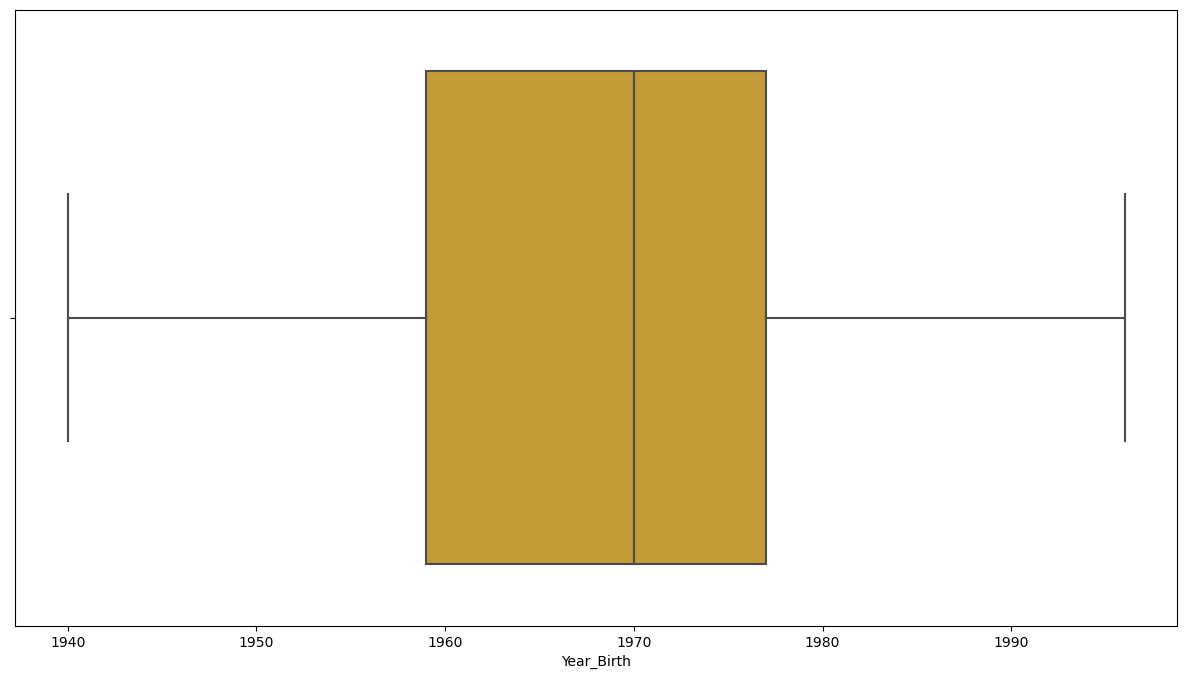

In [23]:
# Recheck
sns.boxplot(df_customer, x= 'Year_Birth', color= 'goldenrod')
plt.show()

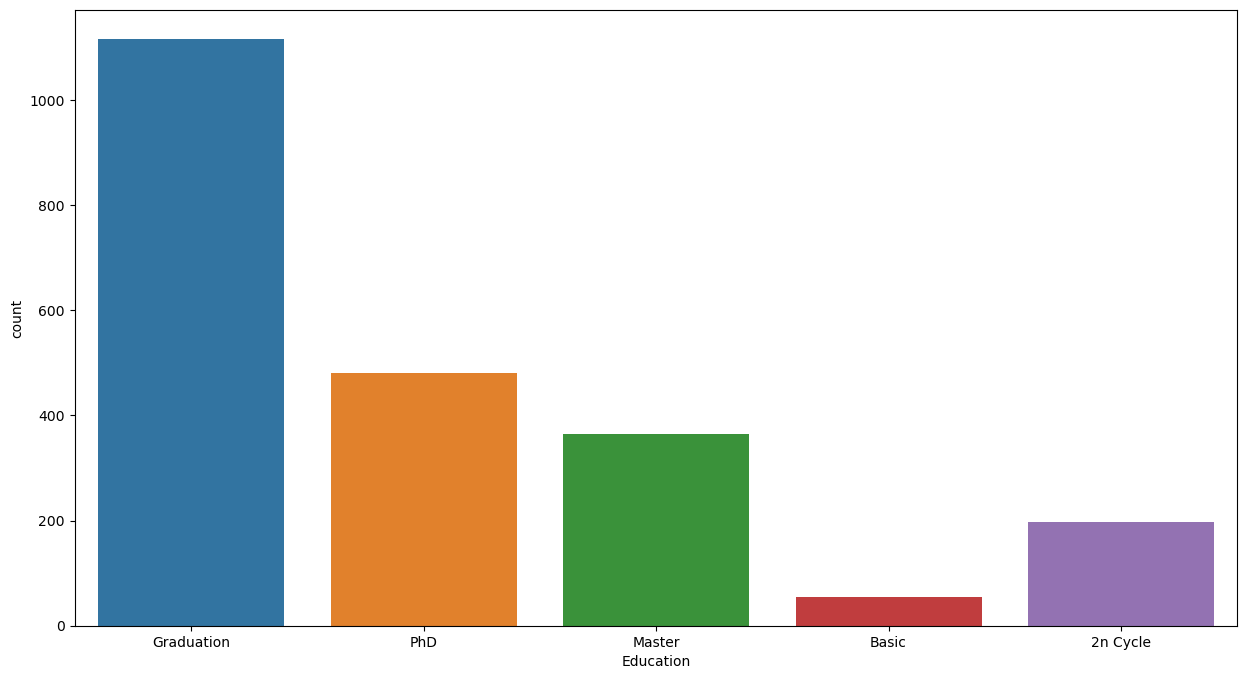

In [24]:
sns.countplot(df_customer, x= 'Education')
plt.show()

- Most customers had a graduation level education while the least amount had Basic level 

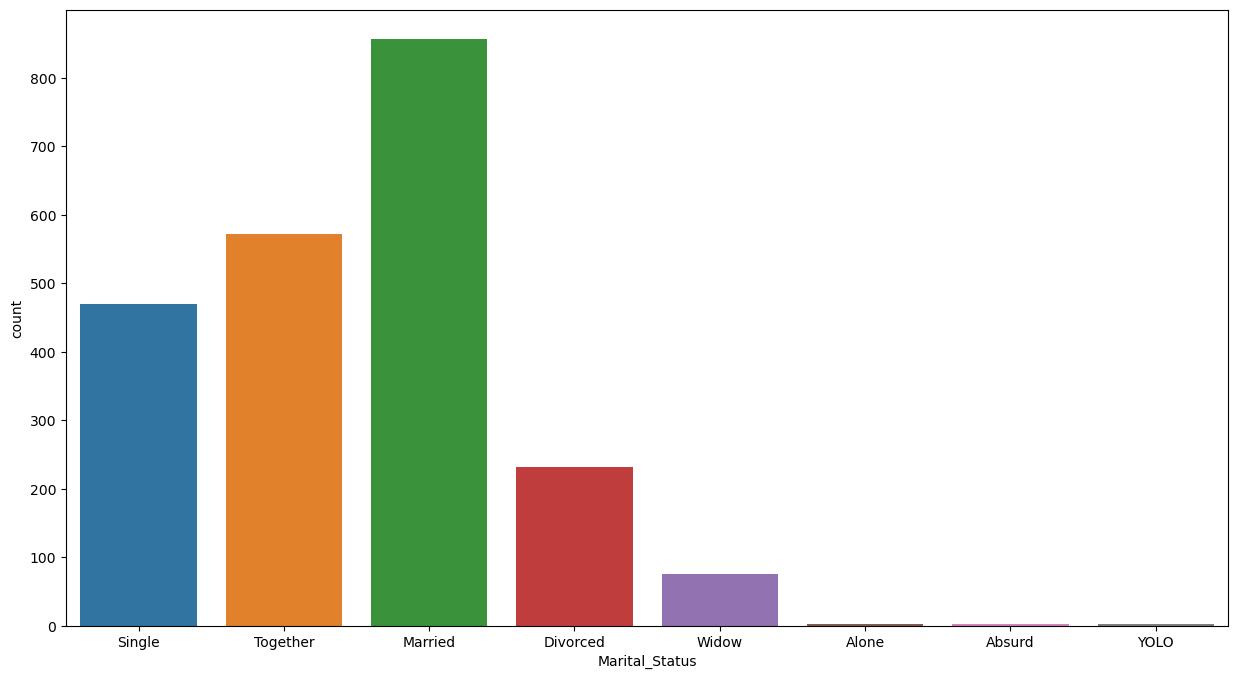

In [26]:
sns.countplot(df_customer, x= 'Marital_Status')
plt.show()

In [27]:
# Exploring the unique values in the categorical features
df_customer['Marital_Status'].value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

- Since, Absurd and YOLO seem to be not known , so we will drop them
- Then, we will convert "Single", "Alone", "Divorced" and "Widow" will be replaced with the value 0
- "Together" and "Married" will be replaced with the value 1
- And we can create a binary column Relationship with value 0 for no relationship and 1 for relationship

In [29]:
print(len(df_customer[df_customer["Marital_Status"] == "Absurd"]))
print(len(df_customer[df_customer["Marital_Status"] == "YOLO"]))
print(len(df_customer))

df_customer = df_customer[~df_customer["Marital_Status"].isin(["Absurd", "YOLO"])]

print(len(df_customer[df_customer["Marital_Status"] == "Absurd"]))
print(len(df_customer[df_customer["Marital_Status"] == "YOLO"]))
print(len(df_customer))

2
2
2213
0
0
2209


In [30]:
df_customer["Relationship"] = [1 if i in ["Together", "Married"] else 0 for i in df_customer["Marital_Status"]]

df_customer = df_customer.drop("Marital_Status", axis=1)

df_customer

ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0      5524        1957  Graduation  58138.0        0         0  04-09-2012   
1      2174        1954  Graduation  46344.0        1         1  08-03-2014   
2      4141        1965  Graduation  71613.0        0         0  21-08-2013   
3      6182        1984  Graduation  26646.0        1         0  10-02-2014   
4      5324        1981         PhD  58293.0        1         0  19-01-2014   
...     ...         ...         ...      ...      ...       ...         ...   
2235  10870        1967  Graduation  61223.0        0         1  13-06-2013   
2236   4001        1946         PhD  64014.0        2         1  10-06-2014   
2237   7270        1981  Graduation  56981.0        0         0  25-01-2014   
2238   8235        1956      Master  69245.0        0         1  24-01-2014   
2239   9405        1954         PhD  52869.0        1         1  15-10-2012   

      Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0          58       635         88  ...             0             0   
1          38        11          1  ...             0             0   
2          26       426         49  ...             0             0   
3          26        11          4  ...             0             0   
4          94       173         43  ...             0             0   
...       ...       ...        ...  ...           ...           ...   
2235       46       709         43  ...             0             0   
2236       56       406          0  ...             0             0   
2237       91       908         48  ...             0             1   
2238        8       428         30  ...             0             0   
2239       40        84          3  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Relationship  
0            11         1             0  
1            11         0             0  
2            11         0             1  
3            11         0             1  
4            11         0             1  
...         ...       ...           ...  
2235         11         0             1  
2236         11         0             1  
2237         11         0             0  
2238         11         0             1  
2239         11         1             1  

[2209 rows x 29 columns]

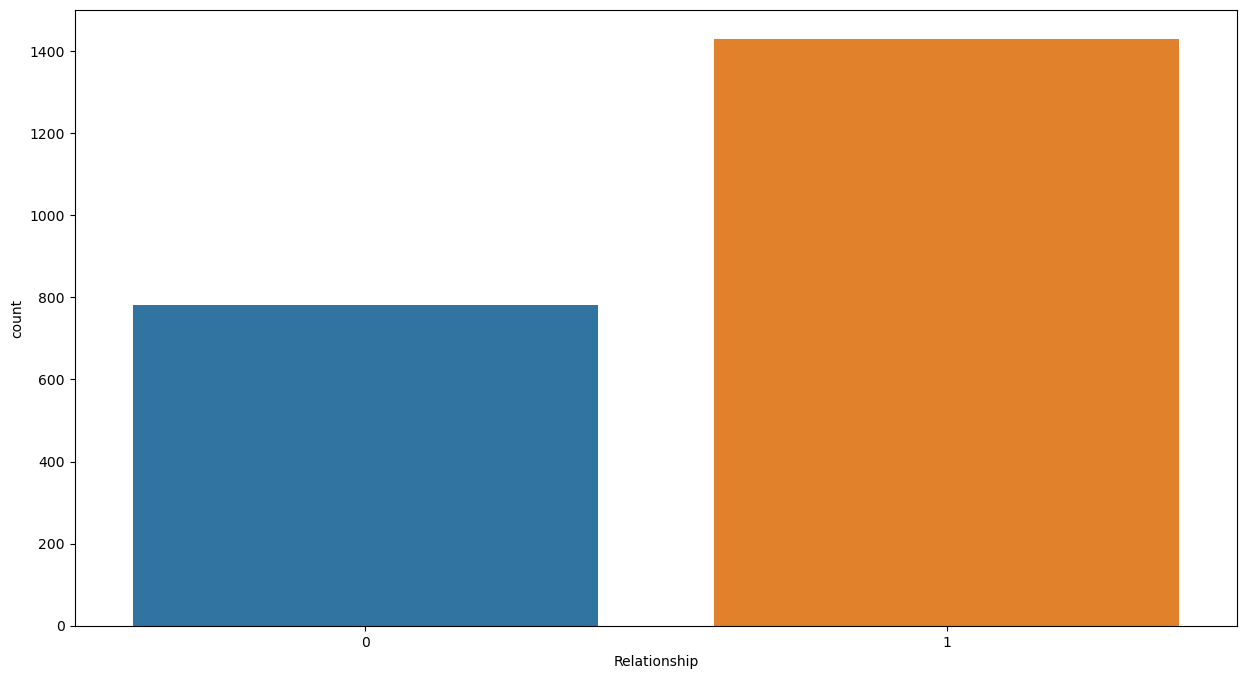

In [31]:
sns.countplot(data=df_customer, x="Relationship")
plt.show()

In [32]:
df_customer['Relationship'].value_counts()

1    1429
0     780
Name: Relationship, dtype: int64

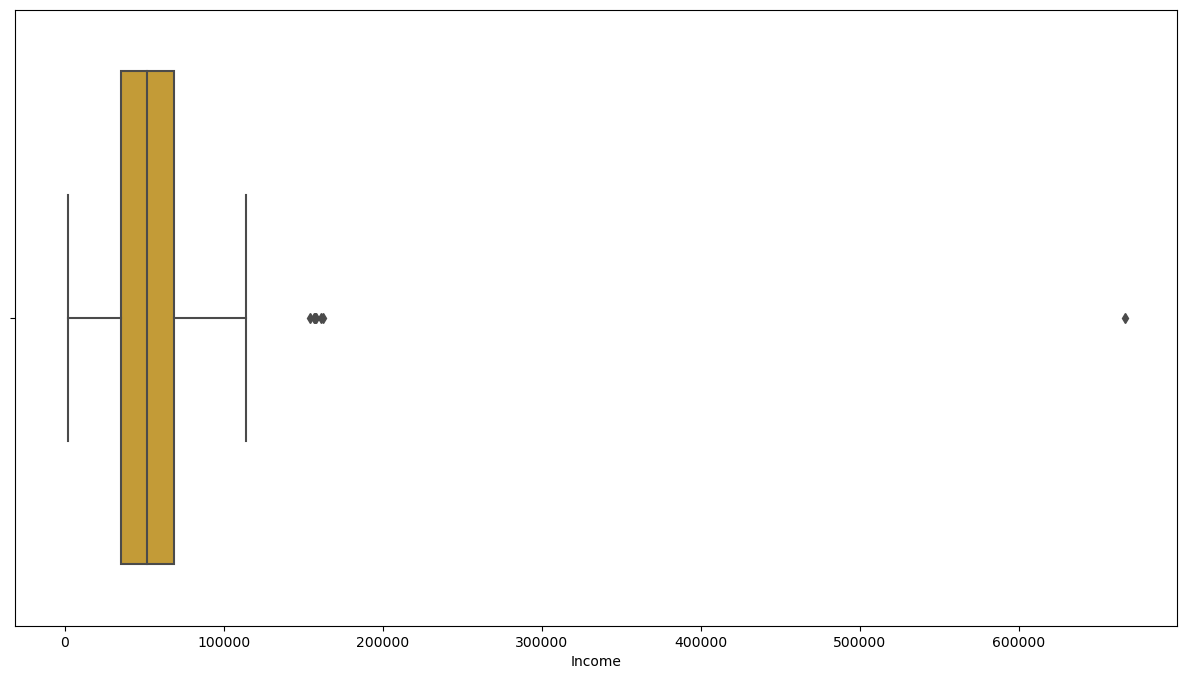

In [33]:
sns.boxplot(data=df_customer, x="Income", color="goldenrod")
plt.show()

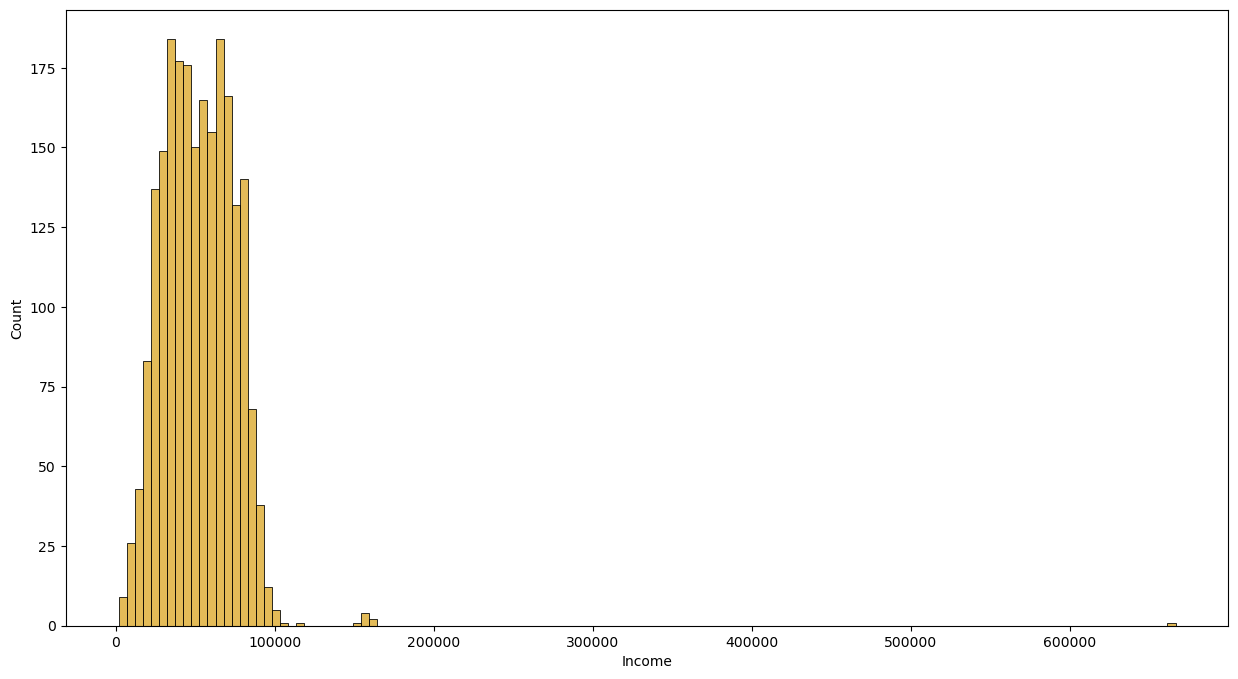

In [34]:
sns.histplot(data=df_customer, x="Income", color="goldenrod")
plt.show()

In [35]:
# removing Outliers from Income 
z_scores = np.abs((df_customer['Income'] - df_customer['Income'].mean()) / df_customer['Income'].std())

df_customer = df_customer[z_scores <= 3]

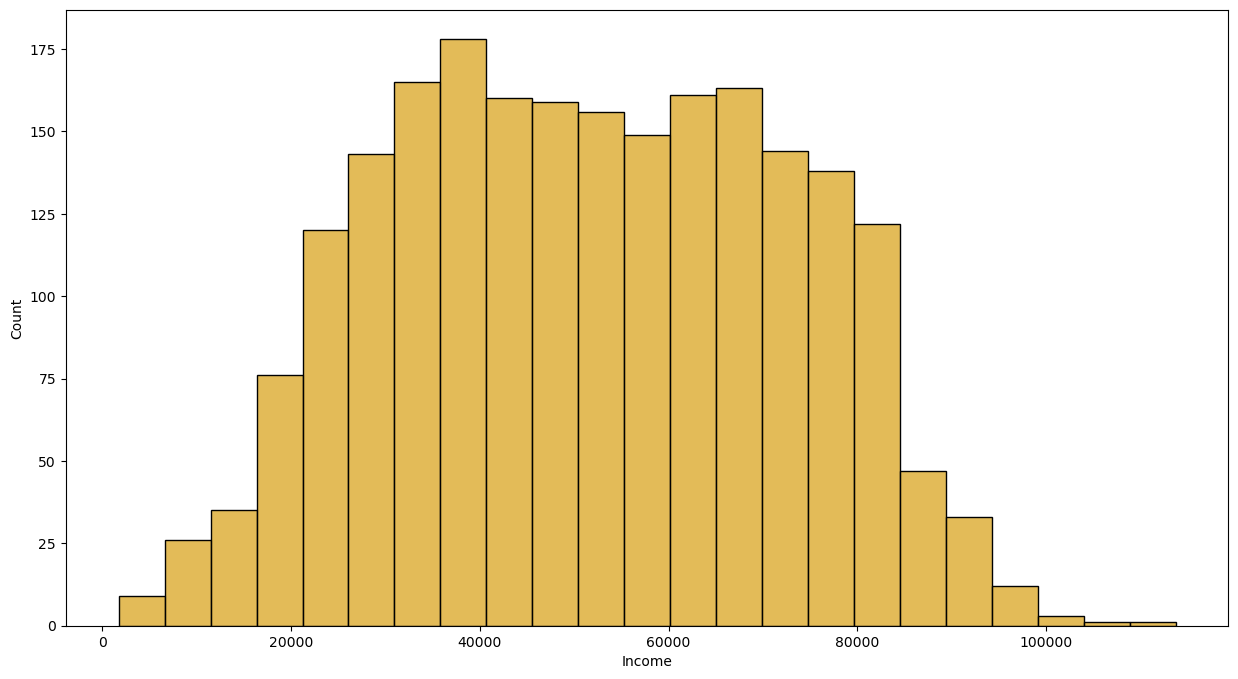

In [36]:
# After removing outliers we can see Income data is normaly distributed
sns.histplot(data=df_customer, x="Income", color="goldenrod")
plt.show()

- Most customers have income between 40000 and 80000 

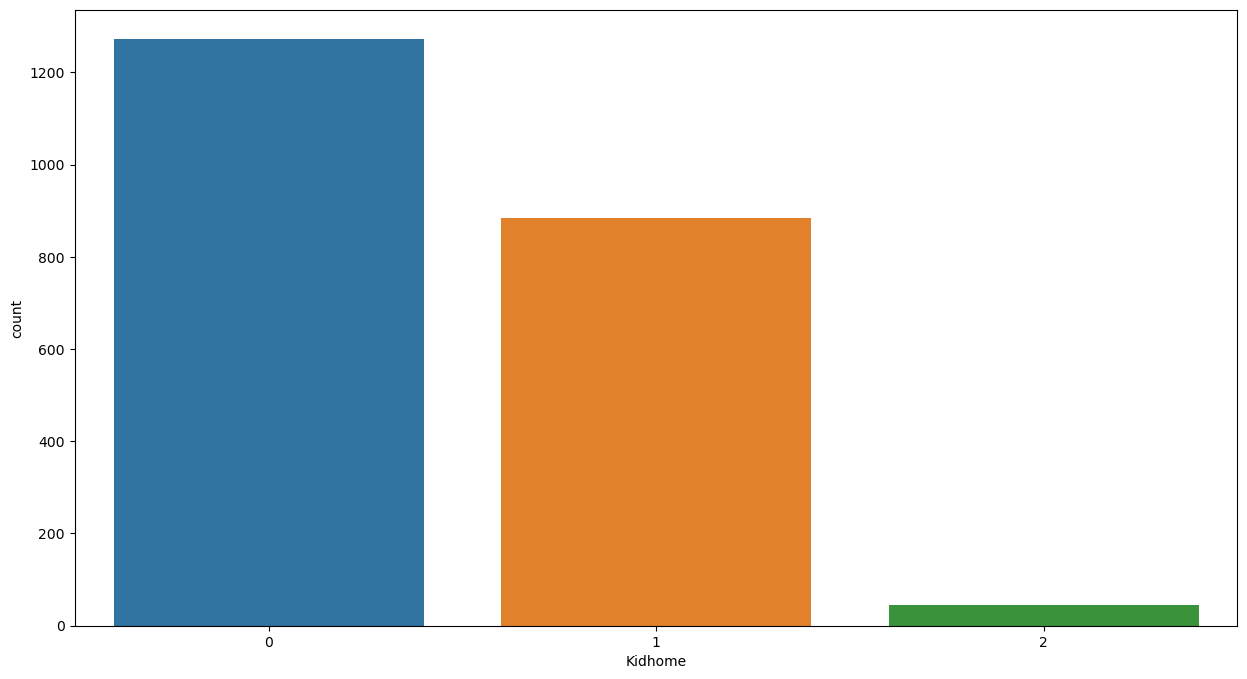

In [38]:
sns.countplot(df_customer, x='Kidhome')
plt.show()

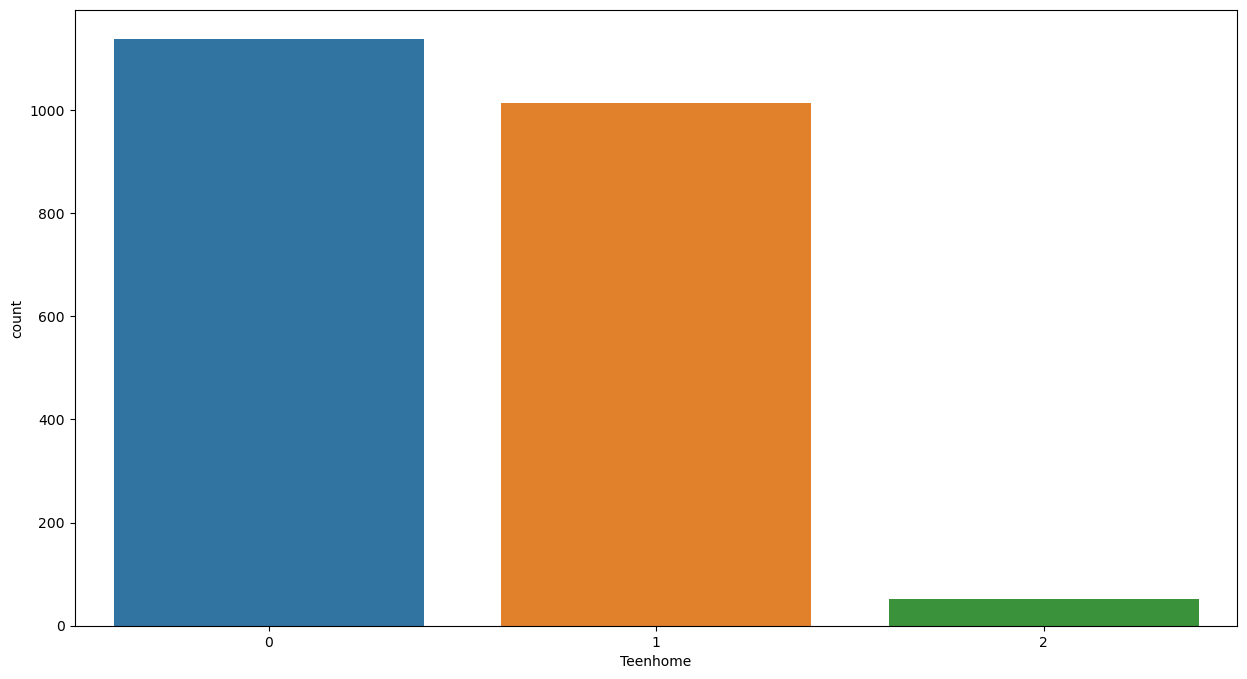

In [39]:
sns.countplot(df_customer, x= 'Teenhome')
plt.show()

In [40]:
# Creating a new column called Total Offspring (by adding both kidhome and Teenhome columns)
df_customer['Offspring'] = df_customer['Kidhome'] + df_customer['Teenhome']
df_customer.head()

ID  Year_Birth   Education   Income  Kidhome  Teenhome Dt_Customer  \
0  5524        1957  Graduation  58138.0        0         0  04-09-2012   
1  2174        1954  Graduation  46344.0        1         1  08-03-2014   
2  4141        1965  Graduation  71613.0        0         0  21-08-2013   
3  6182        1984  Graduation  26646.0        1         0  10-02-2014   
4  5324        1981         PhD  58293.0        1         0  19-01-2014   

   Recency  MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   Relationship  Offspring  
0             0          0  
1             0          2  
2             1          0  
3             1          1  
4             1          1  

[5 rows x 30 columns]

In [41]:
df_customer = df_customer.drop(['Kidhome', 'Teenhome'], axis= 1)
df_customer

ID  Year_Birth   Education   Income Dt_Customer  Recency  MntWines  \
0      5524        1957  Graduation  58138.0  04-09-2012       58       635   
1      2174        1954  Graduation  46344.0  08-03-2014       38        11   
2      4141        1965  Graduation  71613.0  21-08-2013       26       426   
3      6182        1984  Graduation  26646.0  10-02-2014       26        11   
4      5324        1981         PhD  58293.0  19-01-2014       94       173   
...     ...         ...         ...      ...         ...      ...       ...   
2235  10870        1967  Graduation  61223.0  13-06-2013       46       709   
2236   4001        1946         PhD  64014.0  10-06-2014       56       406   
2237   7270        1981  Graduation  56981.0  25-01-2014       91       908   
2238   8235        1956      Master  69245.0  24-01-2014        8       428   
2239   9405        1954         PhD  52869.0  15-10-2012       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp4  \
0            88              546              172  ...             0   
1             1                6                2  ...             0   
2            49              127              111  ...             0   
3             4               20               10  ...             0   
4            43              118               46  ...             0   
...         ...              ...              ...  ...           ...   
2235         43              182               42  ...             0   
2236          0               30                0  ...             0   
2237         48              217               32  ...             1   
2238         30              214               80  ...             0   
2239          3               61                2  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Relationship  Offspring  
0            11         1             0          0  
1            11         0             0          2  
2            11         0             1          0  
3            11         0             1          1  
4            11         0             1          1  
...         ...       ...           ...        ...  
2235         11         0             1          1  
2236         11         0             1          3  
2237         11         0             0          0  
2238         11         0             1          1  
2239         11         1             1          2  

[2201 rows x 28 columns]

In [42]:
# Changing the dtype of Dt_Customer into DateTime
df_customer['Dt_Customer'] = pd.to_datetime(df_customer['Dt_Customer'])
dates = []

for i in df_customer['Dt_Customer']:
    i = i.date()
    dates.append(i)

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [43]:
type(df_customer['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

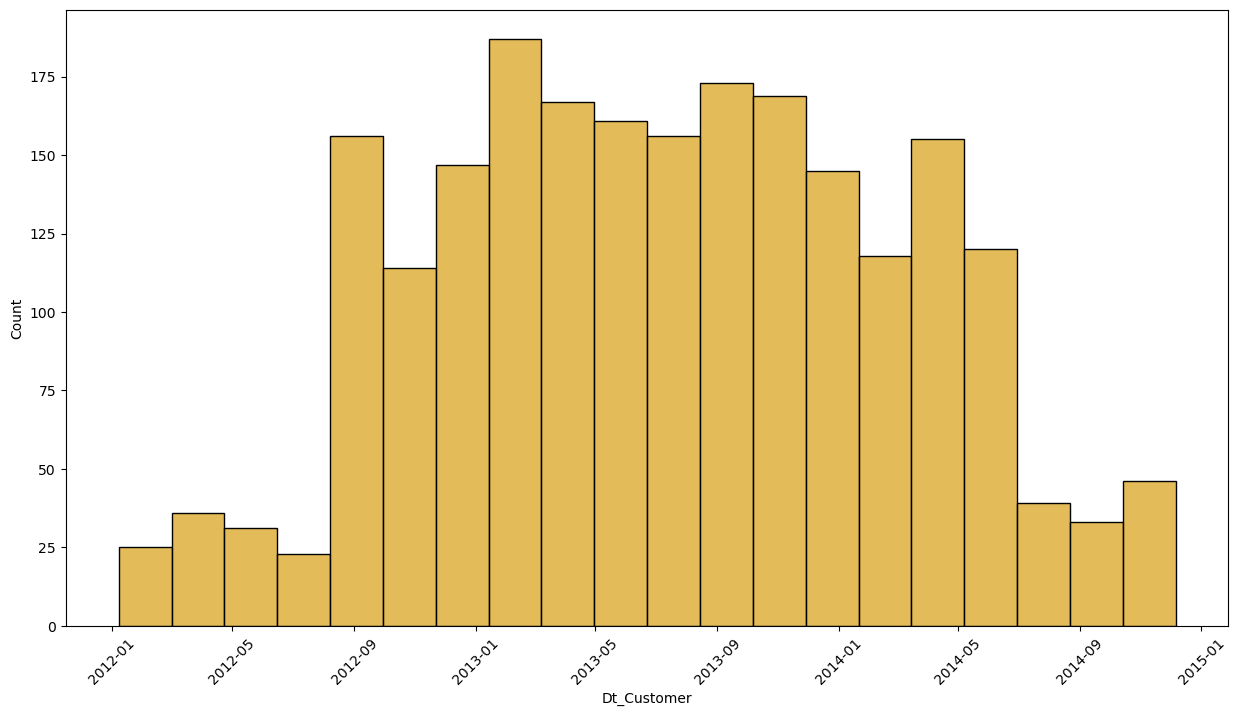

In [44]:
sns.histplot(data=df_customer, x="Dt_Customer", color="goldenrod")
plt.xticks(rotation=45)

plt.show()

- Uniform distribution from 07-2012 and 07-2014

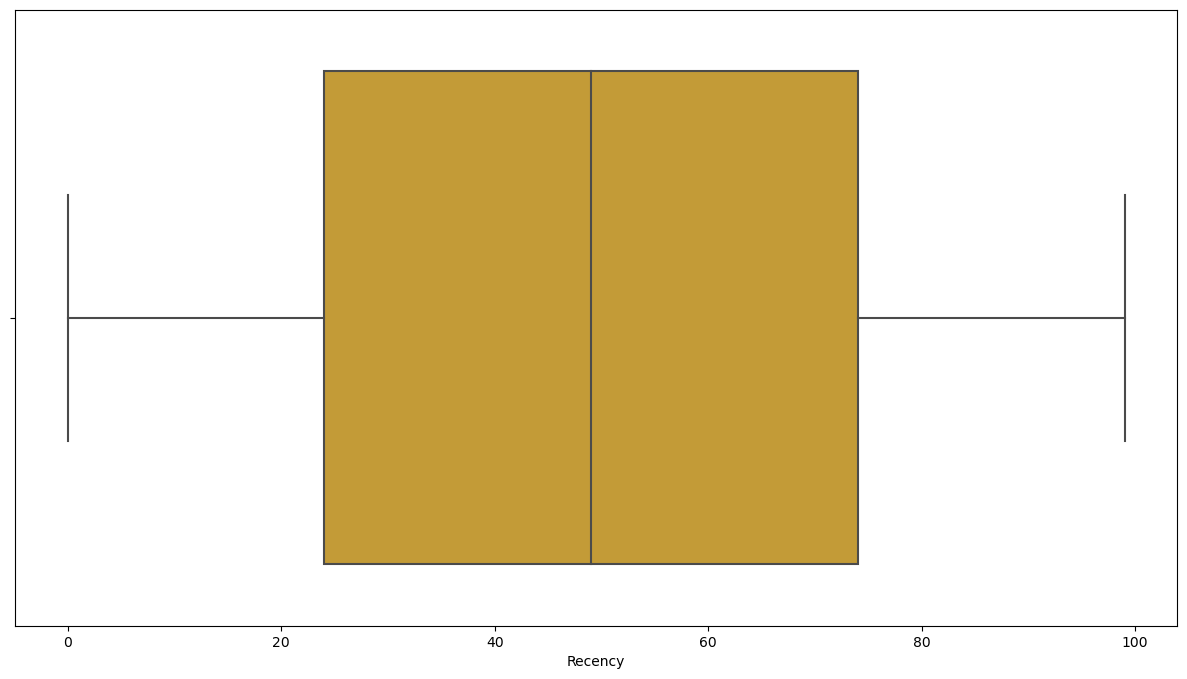

In [46]:
sns.boxplot(data=df_customer, x="Recency", color="goldenrod")
plt.show()

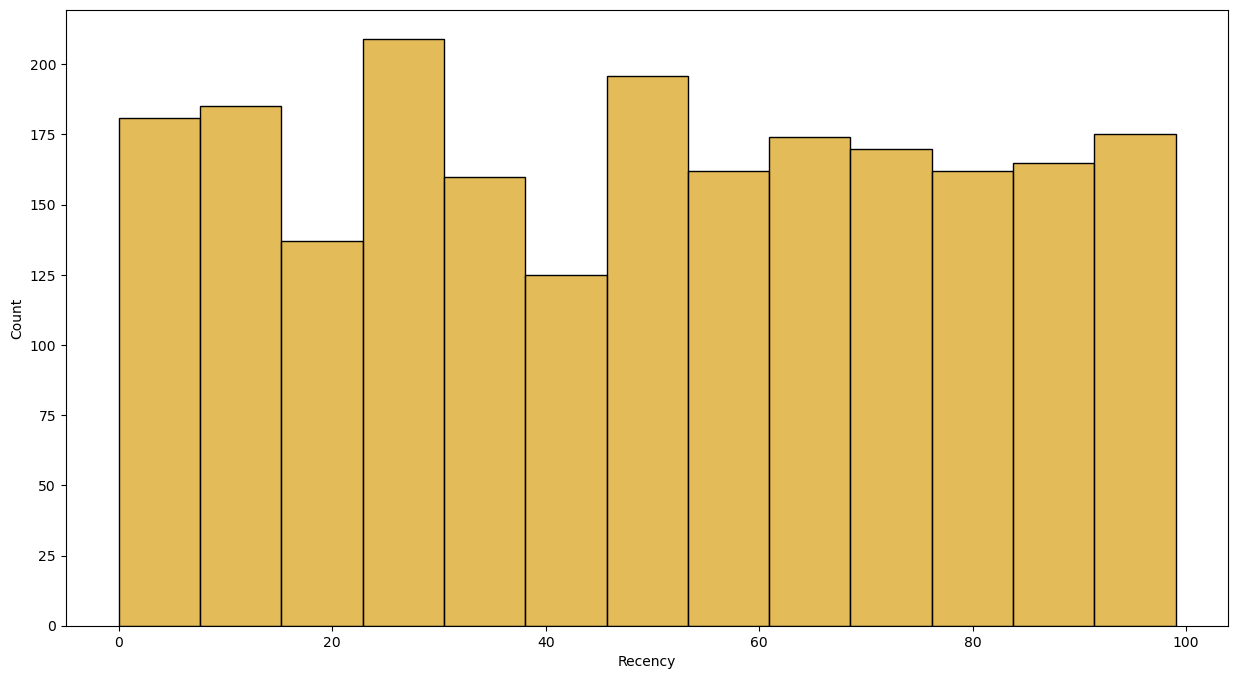

In [47]:
sns.histplot(data=df_customer, x="Recency", color="goldenrod")
plt.show()

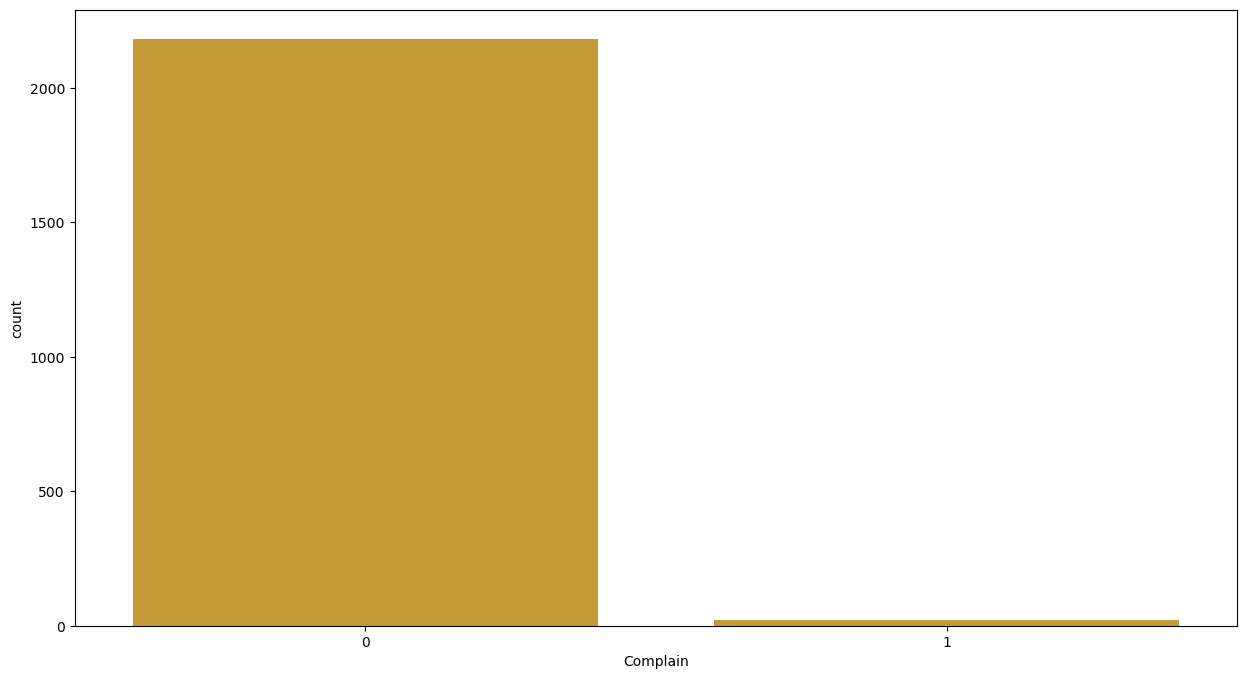

In [48]:
sns.countplot(data=df_customer, x="Complain", color="goldenrod")
plt.show()

**Products Columns**

In [50]:
# Creating a new feature called Spending
df_customer["Spending"] = df_customer["MntWines"] + df_customer["MntFruits"] + df_customer["MntMeatProducts"] + \
                        df_customer["MntFishProducts"] + df_customer["MntSweetProducts"] + df_customer["MntGoldProds"]

df_customer

ID  Year_Birth   Education   Income Dt_Customer  Recency  MntWines  \
0      5524        1957  Graduation  58138.0  2012-04-09       58       635   
1      2174        1954  Graduation  46344.0  2014-08-03       38        11   
2      4141        1965  Graduation  71613.0  2013-08-21       26       426   
3      6182        1984  Graduation  26646.0  2014-10-02       26        11   
4      5324        1981         PhD  58293.0  2014-01-19       94       173   
...     ...         ...         ...      ...         ...      ...       ...   
2235  10870        1967  Graduation  61223.0  2013-06-13       46       709   
2236   4001        1946         PhD  64014.0  2014-10-06       56       406   
2237   7270        1981  Graduation  56981.0  2014-01-25       91       908   
2238   8235        1956      Master  69245.0  2014-01-24        8       428   
2239   9405        1954         PhD  52869.0  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp5  \
0            88              546              172  ...             0   
1             1                6                2  ...             0   
2            49              127              111  ...             0   
3             4               20               10  ...             0   
4            43              118               46  ...             0   
...         ...              ...              ...  ...           ...   
2235         43              182               42  ...             0   
2236          0               30                0  ...             0   
2237         48              217               32  ...             0   
2238         30              214               80  ...             0   
2239          3               61                2  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0                0             0         0              3         11   
1                0             0         0              3         11   
2                0             0         0              3         11   
3                0             0         0              3         11   
4                0             0         0              3         11   
...            ...           ...       ...            ...        ...   
2235             0             0         0              3         11   
2236             1             0         0              3         11   
2237             0             0         0              3         11   
2238             0             0         0              3         11   
2239             0             0         0              3         11   

      Response  Relationship  Offspring  Spending  
0            1             0          0      1617  
1            0             0          2        27  
2            0             1          0       776  
3            0             1          1        53  
4            0             1          1       422  
...        ...           ...        ...       ...  
2235         0             1          1      1341  
2236         0             1          3       444  
2237         0             0          0      1241  
2238         0             1          1       843  
2239         1             1          2       172  

[2201 rows x 29 columns]

In [51]:
# Now, let's drop the six columns
cols =  ["MntWines", "MntFruits", "MntMeatProducts",
        "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

df_customer = df_customer.drop(cols, axis= 1)
df_customer

ID  Year_Birth   Education   Income Dt_Customer  Recency  \
0      5524        1957  Graduation  58138.0  2012-04-09       58   
1      2174        1954  Graduation  46344.0  2014-08-03       38   
2      4141        1965  Graduation  71613.0  2013-08-21       26   
3      6182        1984  Graduation  26646.0  2014-10-02       26   
4      5324        1981         PhD  58293.0  2014-01-19       94   
...     ...         ...         ...      ...         ...      ...   
2235  10870        1967  Graduation  61223.0  2013-06-13       46   
2236   4001        1946         PhD  64014.0  2014-10-06       56   
2237   7270        1981  Graduation  56981.0  2014-01-25       91   
2238   8235        1956      Master  69245.0  2014-01-24        8   
2239   9405        1954         PhD  52869.0  2012-10-15       40   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                     4  ...             0             0             0   
1                     2  ...             0             0             0   
2                    10  ...             0             0             0   
3                     4  ...             0             0             0   
4                     6  ...             0             0             0   
...                 ...  ...           ...           ...           ...   
2235                  4  ...             0             0             0   
2236                  5  ...             0             1             0   
2237                 13  ...             0             0             0   
2238                 10  ...             0             0             0   
2239                  4  ...             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  Relationship  Offspring  \
0            0              3         11         1             0          0   
1            0              3         11         0             0          2   
2            0              3         11         0             1          0   
3            0              3         11         0             1          1   
4            0              3         11         0             1          1   
...        ...            ...        ...       ...           ...        ...   
2235         0              3         11         0             1          1   
2236         0              3         11         0             1          3   
2237         0              3         11         0             0          0   
2238         0              3         11         0             1          1   
2239         0              3         11         1             1          2   

      Spending  
0         1617  
1           27  
2          776  
3           53  
4          422  
...        ...  
2235      1341  
2236       444  
2237      1241  
2238       843  
2239       172  

[2201 rows x 23 columns]

In [52]:
df_customer = df_customer.drop('ID', axis=1)
df_customer

Year_Birth   Education   Income Dt_Customer  Recency  NumDealsPurchases  \
0           1957  Graduation  58138.0  2012-04-09       58                  3   
1           1954  Graduation  46344.0  2014-08-03       38                  2   
2           1965  Graduation  71613.0  2013-08-21       26                  1   
3           1984  Graduation  26646.0  2014-10-02       26                  2   
4           1981         PhD  58293.0  2014-01-19       94                  5   
...          ...         ...      ...         ...      ...                ...   
2235        1967  Graduation  61223.0  2013-06-13       46                  2   
2236        1946         PhD  64014.0  2014-10-06       56                  7   
2237        1981  Graduation  56981.0  2014-01-25       91                  1   
2238        1956      Master  69245.0  2014-01-24        8                  2   
2239        1954         PhD  52869.0  2012-10-15       40                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                     7  ...             0             0             0   
1                     5  ...             0             0             0   
2                     4  ...             0             0             0   
3                     6  ...             0             0             0   
4                     5  ...             0             0             0   
...                 ...  ...           ...           ...           ...   
2235                  5  ...             0             0             0   
2236                  7  ...             0             1             0   
2237                  6  ...             0             0             0   
2238                  3  ...             0             0             0   
2239                  7  ...             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  Relationship  Offspring  \
0            0              3         11         1             0          0   
1            0              3         11         0             0          2   
2            0              3         11         0             1          0   
3            0              3         11         0             1          1   
4            0              3         11         0             1          1   
...        ...            ...        ...       ...           ...        ...   
2235         0              3         11         0             1          1   
2236         0              3         11         0             1          3   
2237         0              3         11         0             0          0   
2238         0              3         11         0             1          1   
2239         0              3         11         1             1          2   

      Spending  
0         1617  
1           27  
2          776  
3           53  
4          422  
...        ...  
2235      1341  
2236       444  
2237      1241  
2238       843  
2239       172  

[2201 rows x 22 columns]

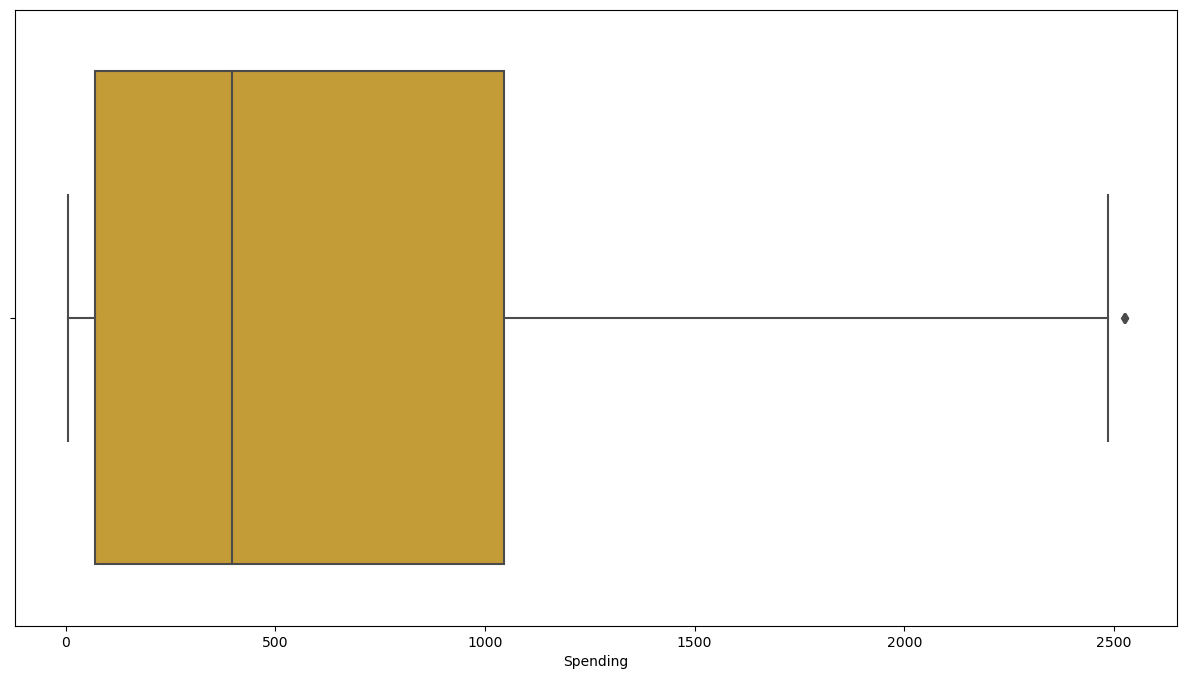

In [53]:
sns.boxplot(data=df_customer, x="Spending", color="goldenrod")
plt.show()

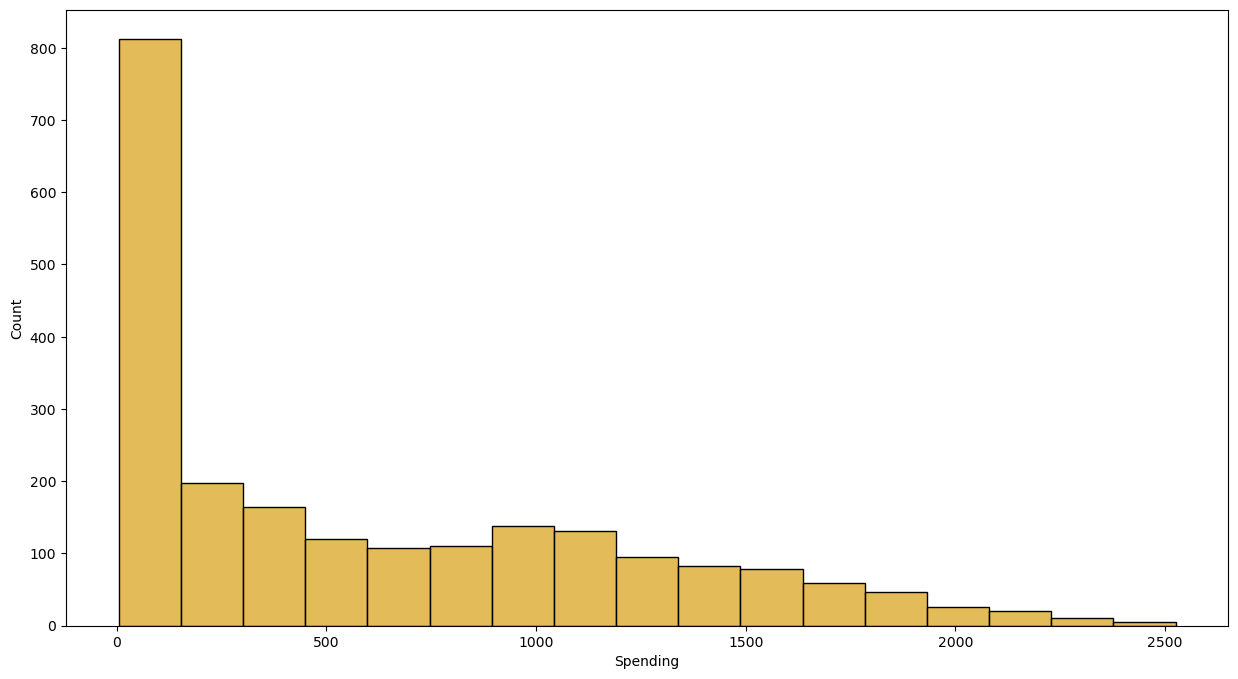

In [54]:
sns.histplot(data=df_customer, x="Spending", color="goldenrod")
plt.show()

**Promotion Columns**

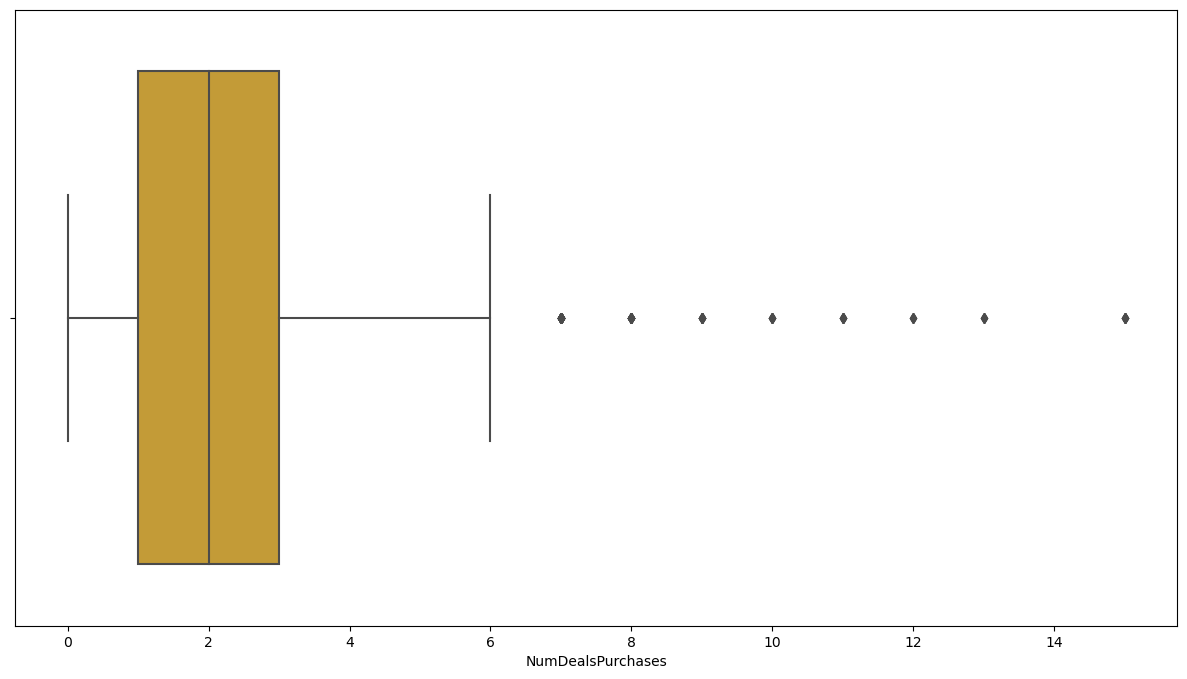

In [56]:
sns.boxplot(data=df_customer, x="NumDealsPurchases", color="goldenrod")
plt.show()

- As we can see there are multiple outliers, so we need to get rid of it.

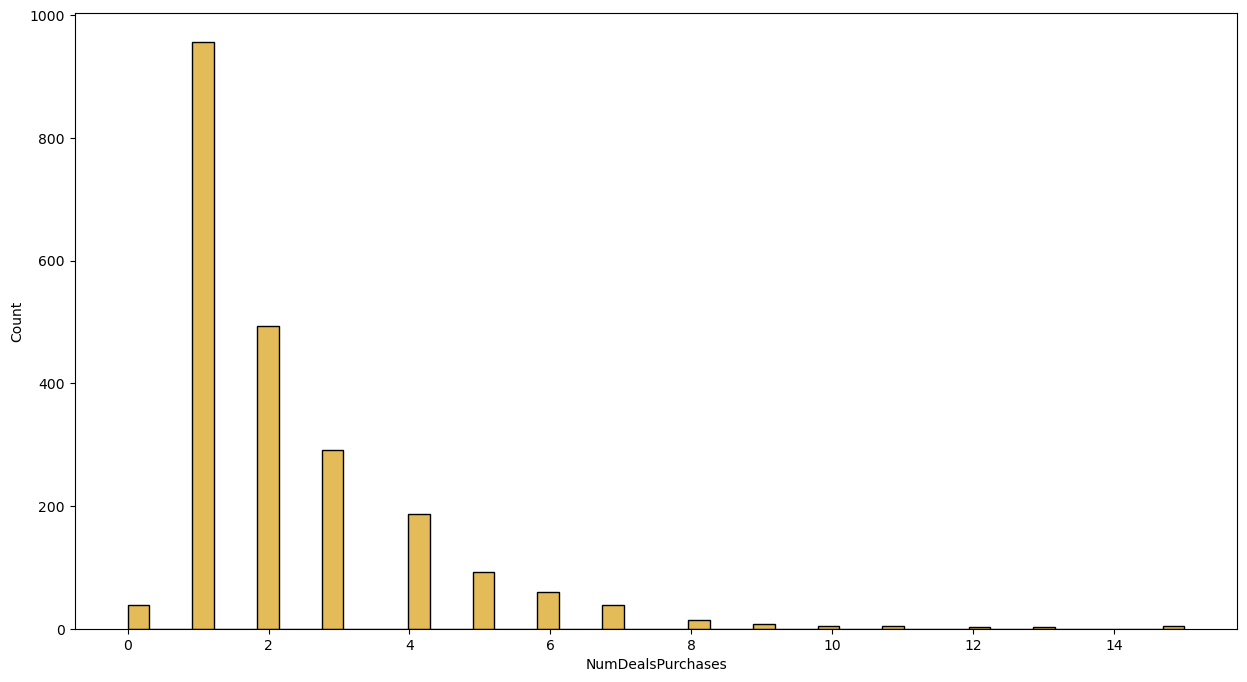

In [58]:
sns.histplot(data=df_customer, x="NumDealsPurchases", color="goldenrod")
plt.show()

In [60]:
print(len(df_customer[df_customer['NumDealsPurchases'] > 6]))

82


In [62]:
# IQR

# calculate Q1 and Q3

Q1 = np.percentile(df_customer['NumDealsPurchases'], 25)
Q3 = np.percentile(df_customer['NumDealsPurchases'], 75)


# calculate IQR

IQR = Q3 - Q1

# define lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# drop rows with values outside the bounds

df_customer = df_customer[(df_customer['NumDealsPurchases'] >= lower_bound) & (df_customer['NumDealsPurchases'] <= upper_bound)]

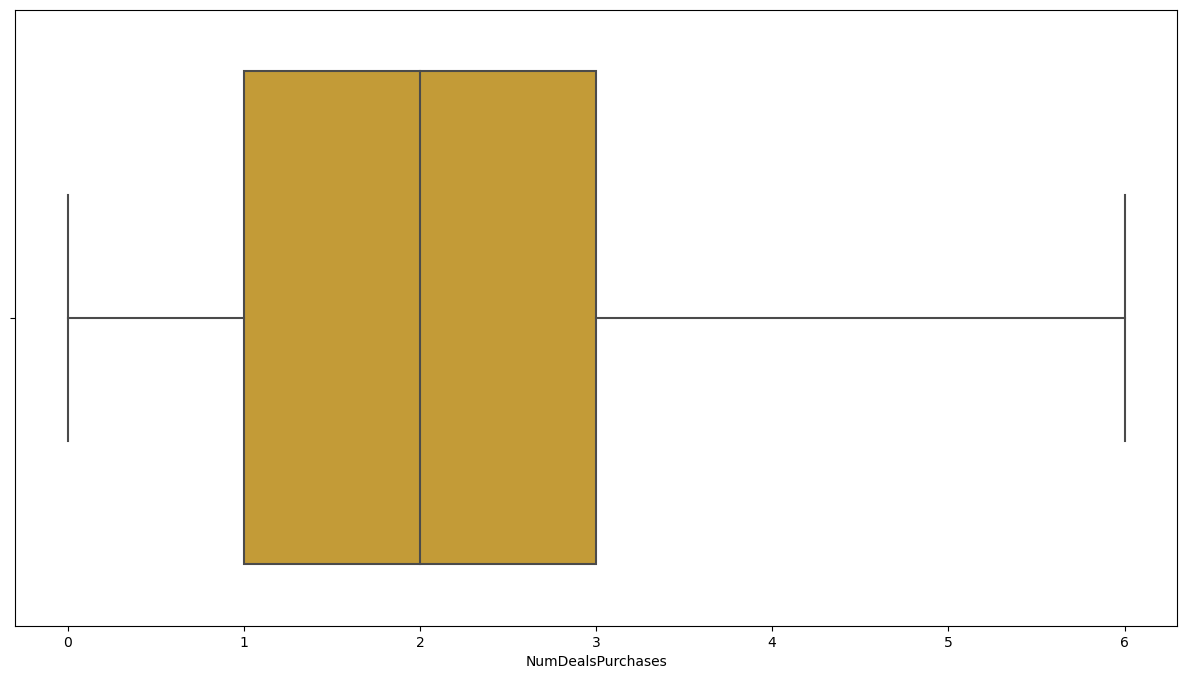

In [64]:
sns.boxplot(data=df_customer, x="NumDealsPurchases", color="goldenrod")
plt.show()

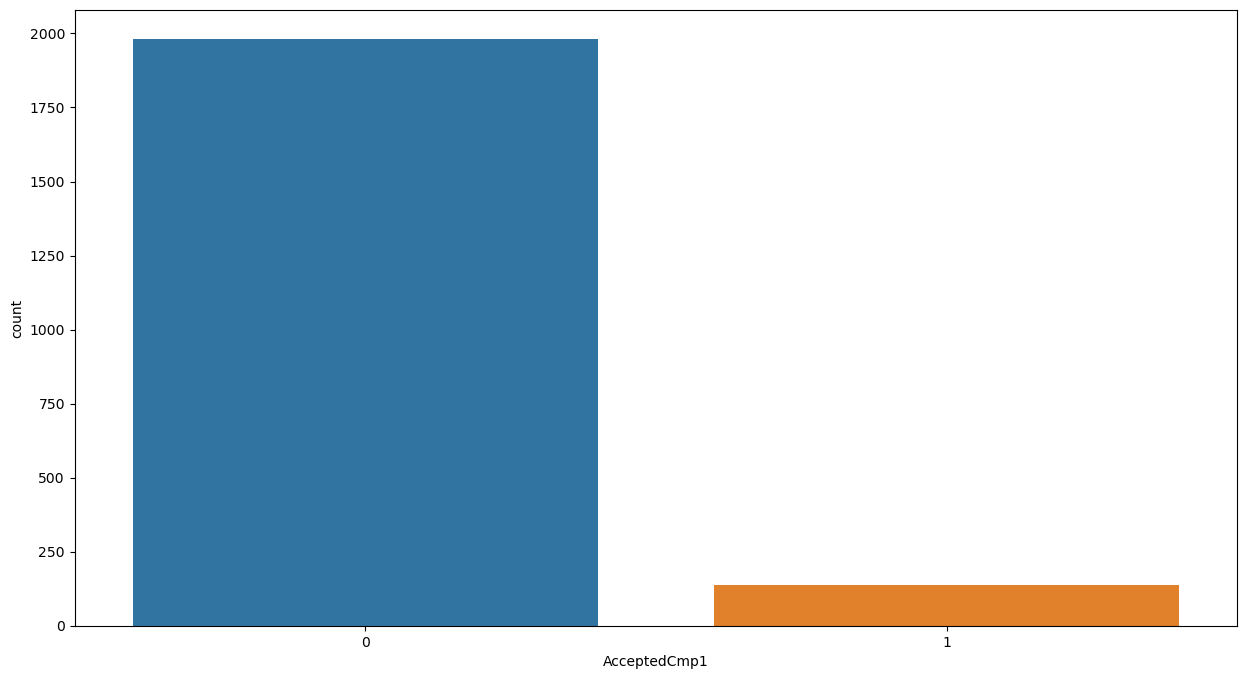

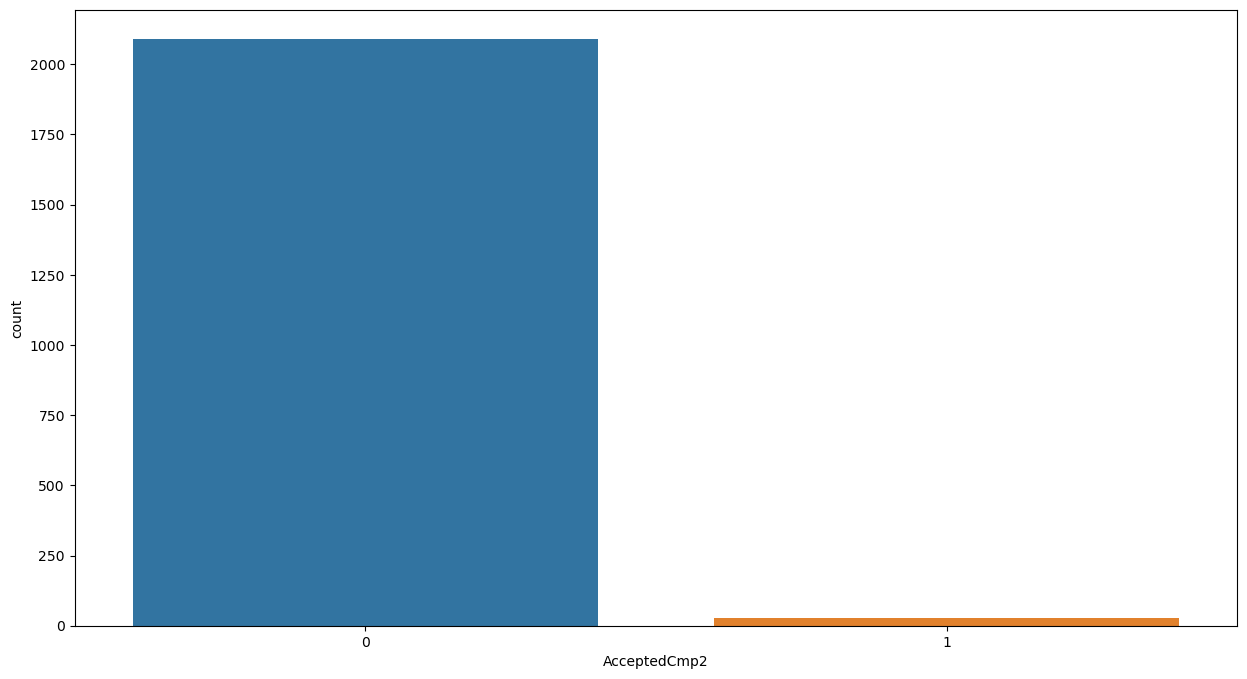

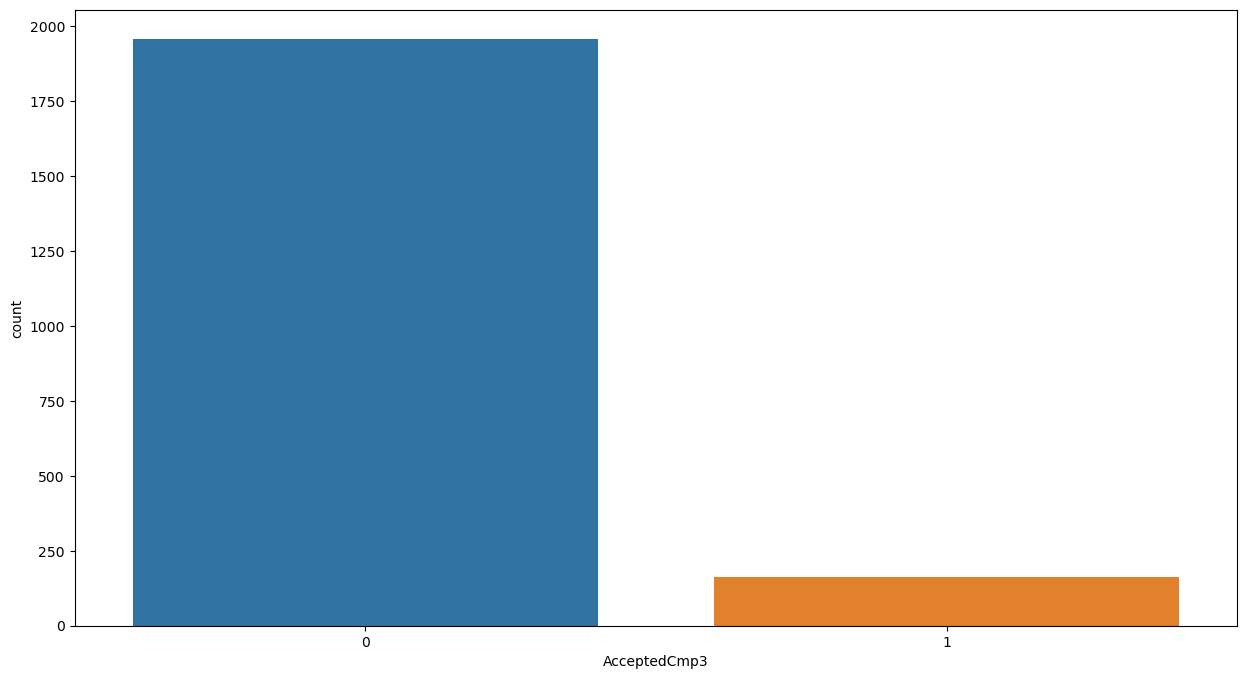

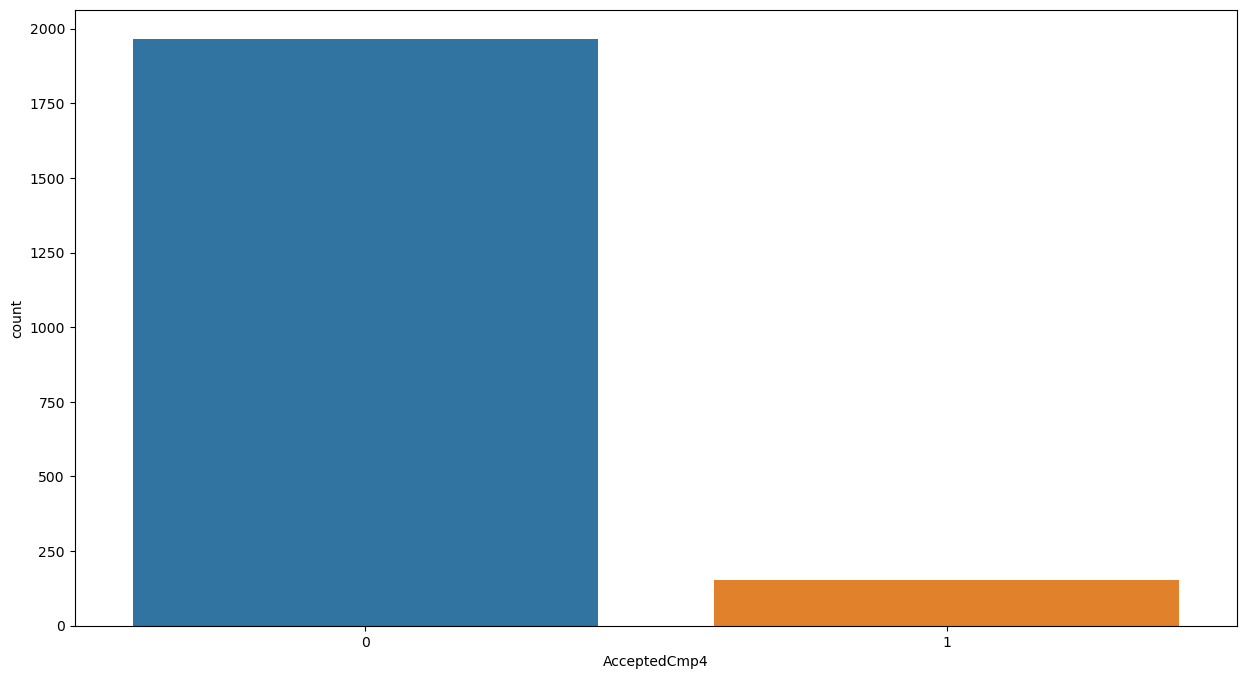

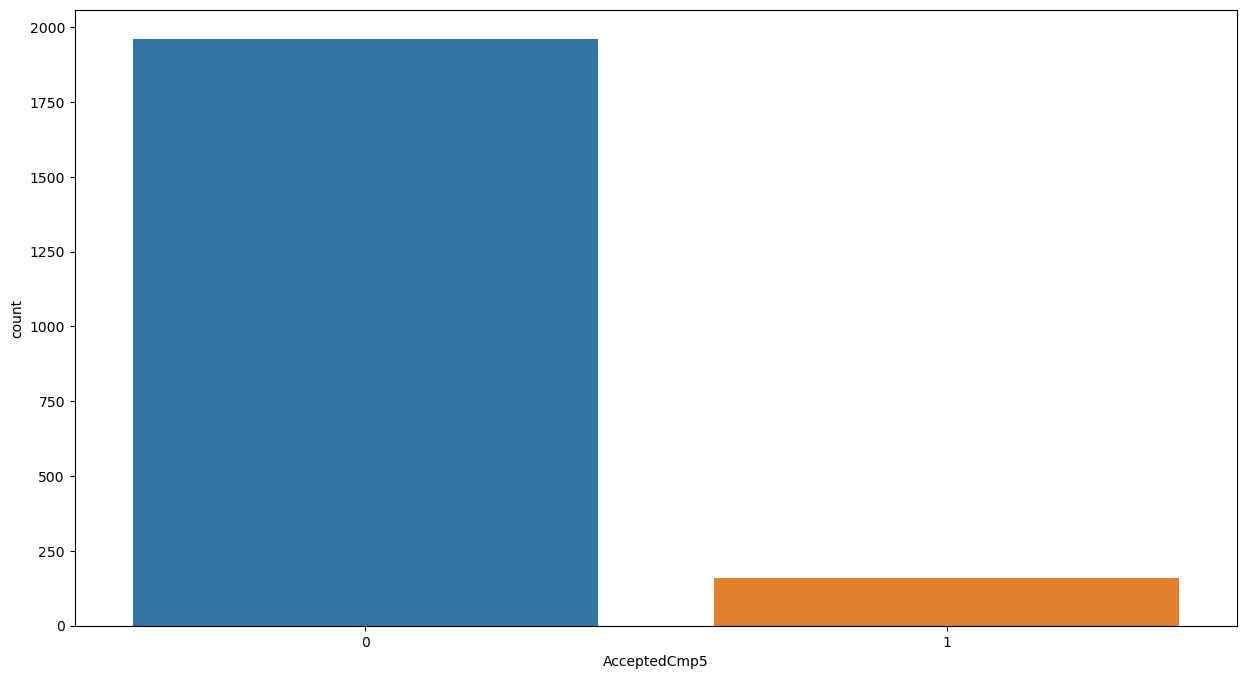

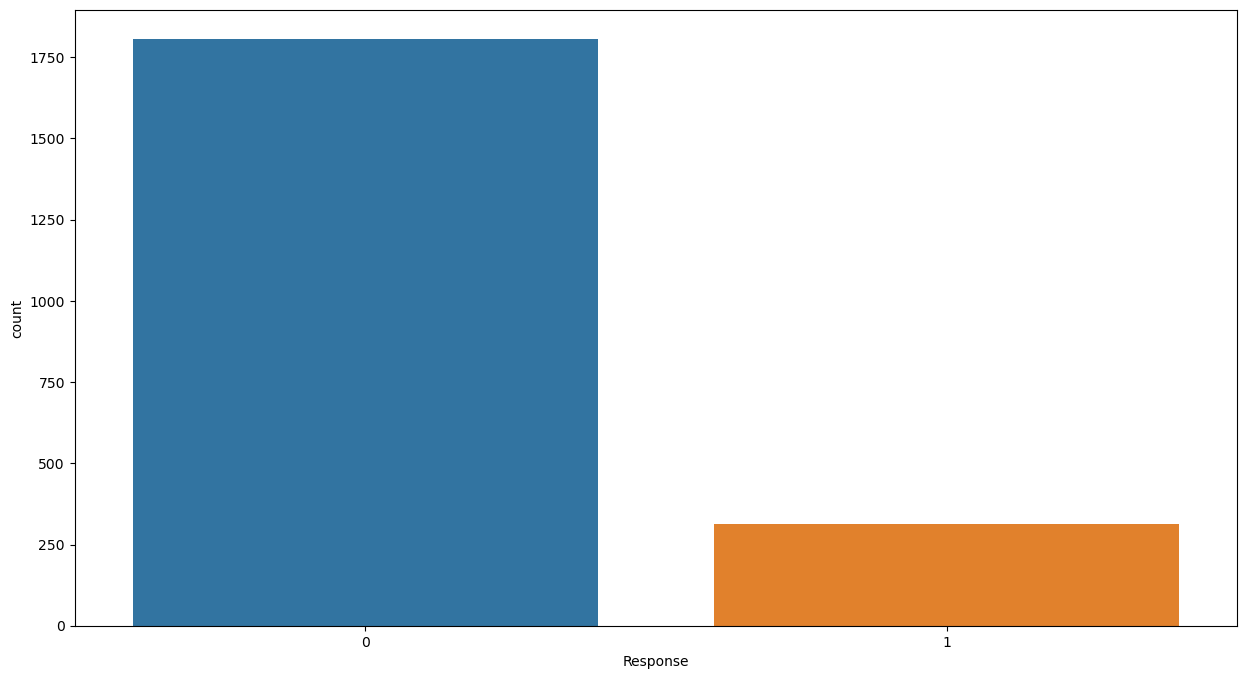

In [66]:
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

for i in cols:
    sns.countplot(data=df_customer, x=i)
    plt.show()

**It seems that the Last Campaign(Promotion) was the most suuccessful**  
**the Second Campaign was the least succeessful one**

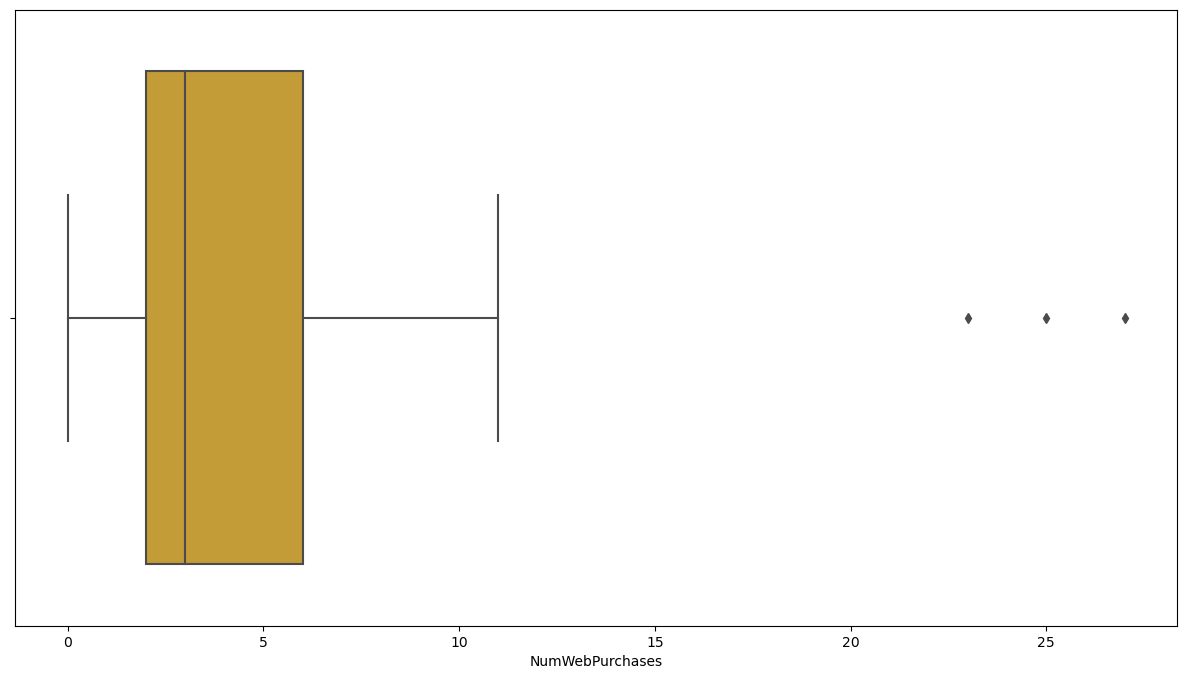

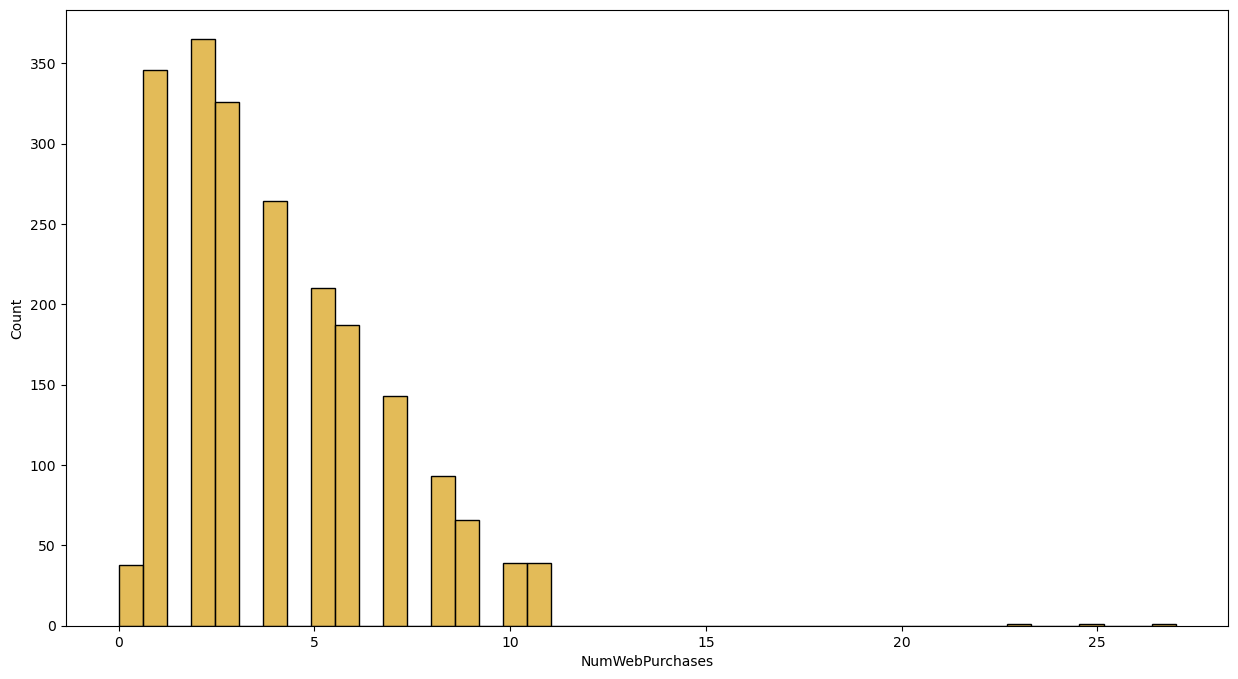

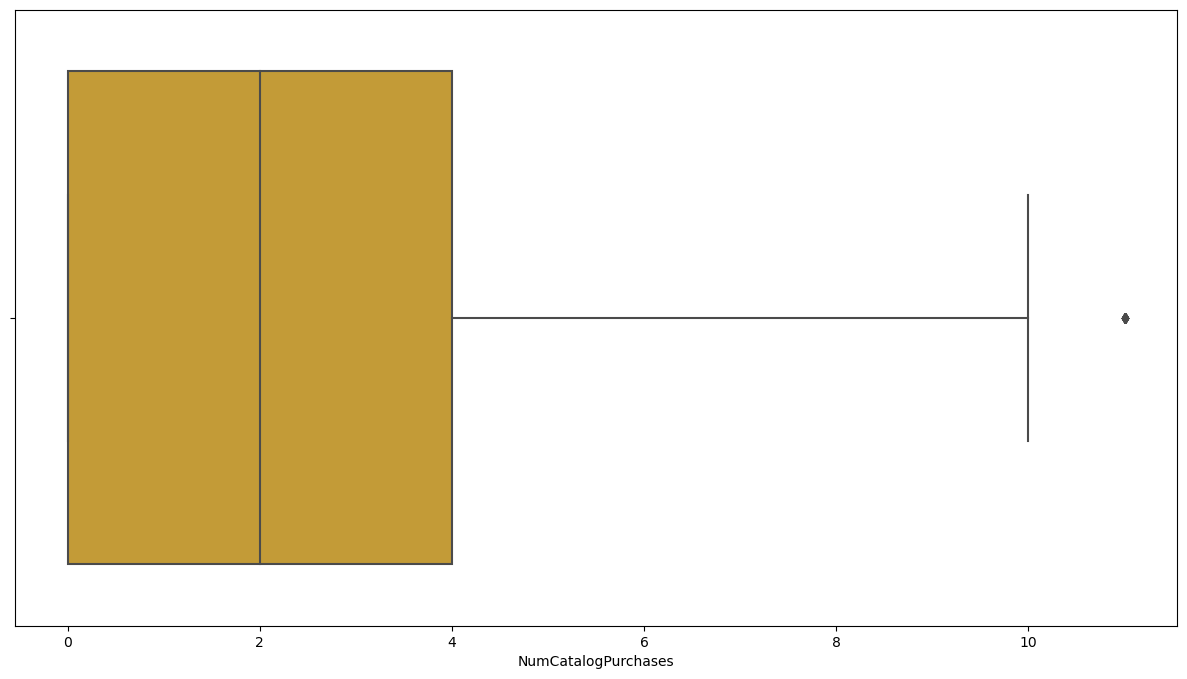

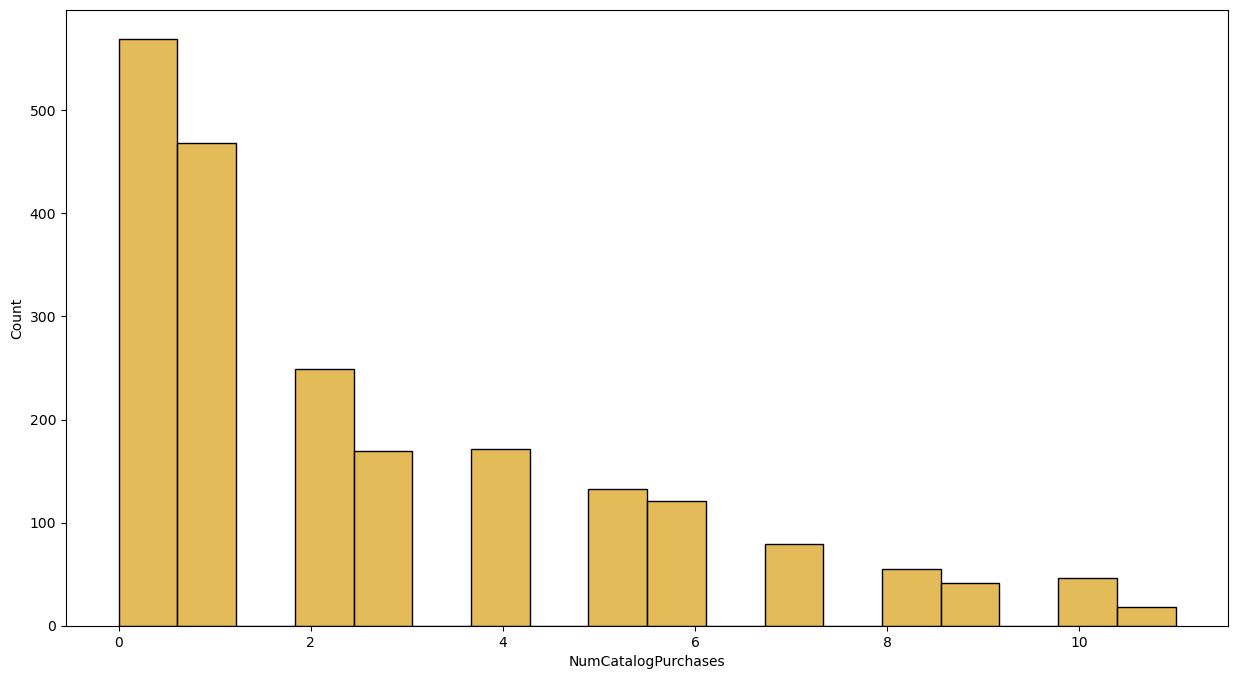

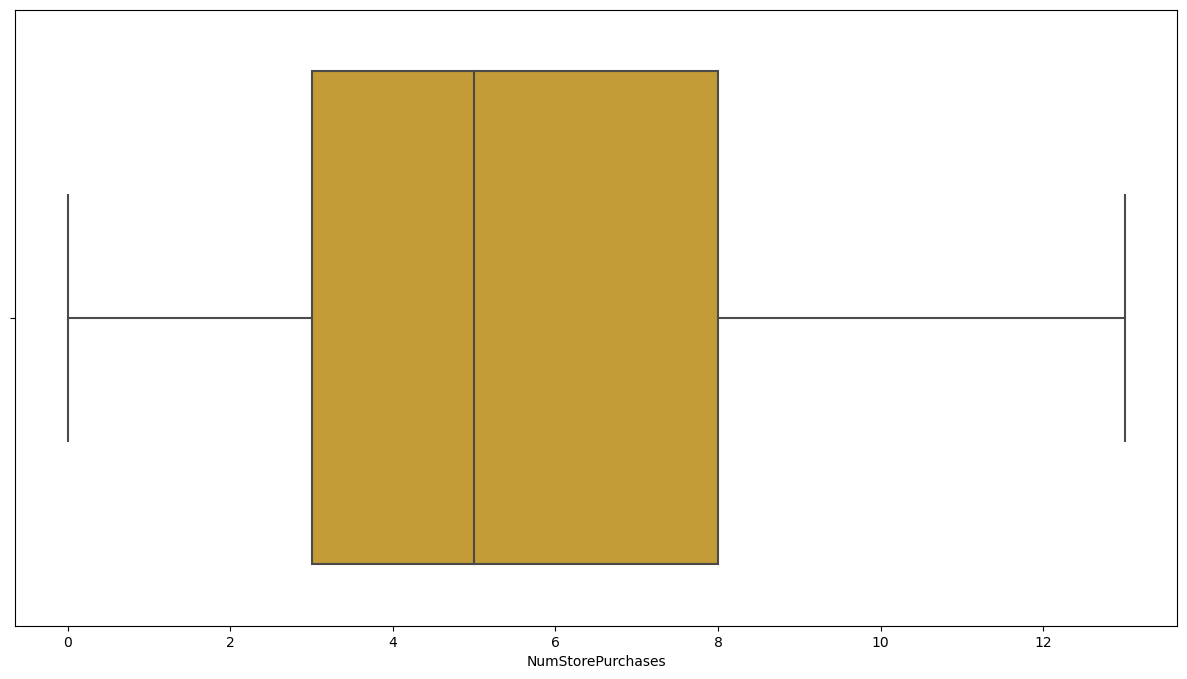

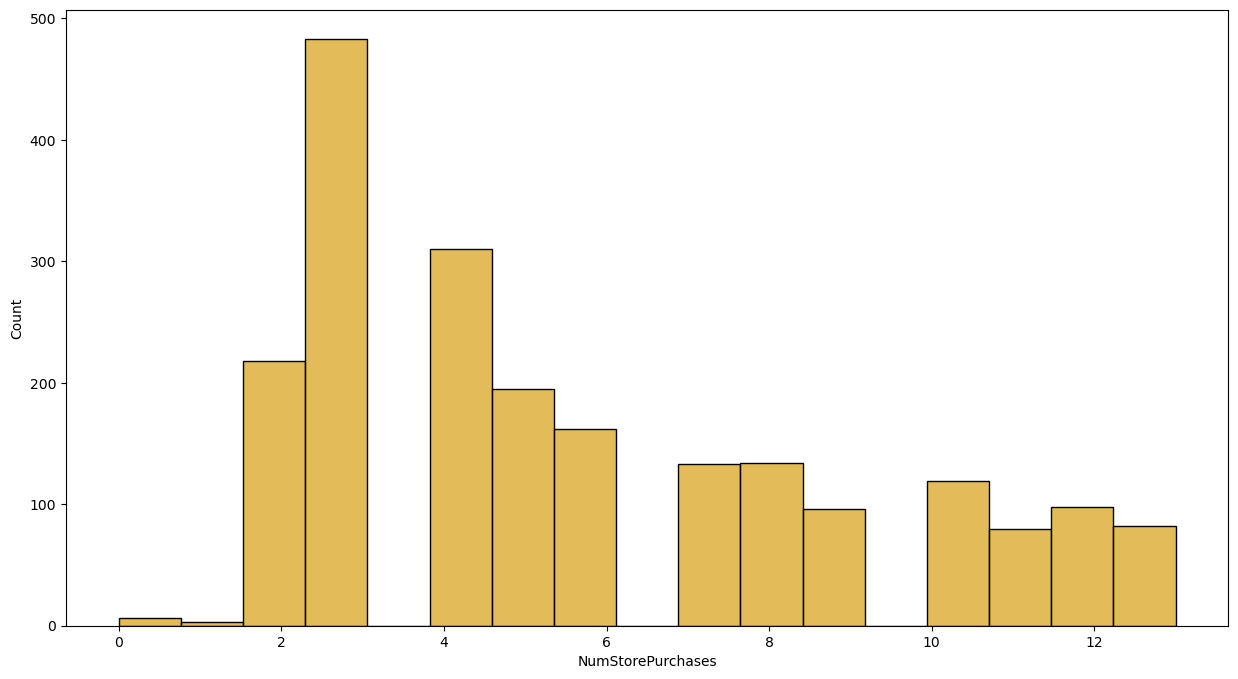

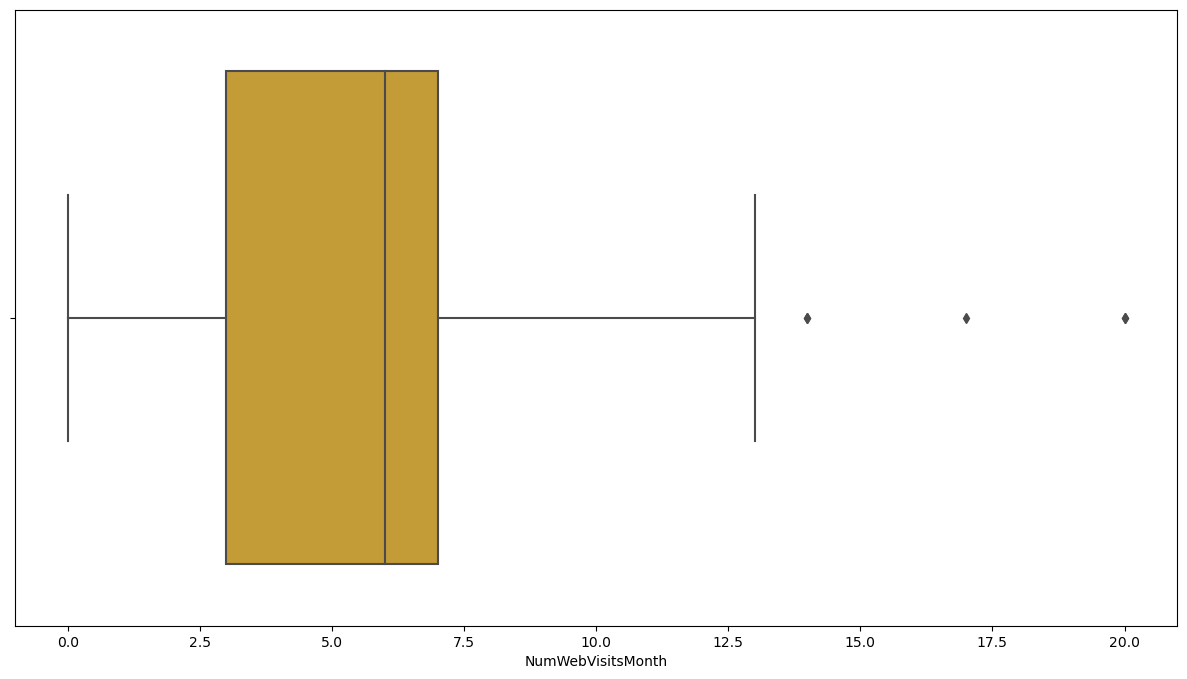

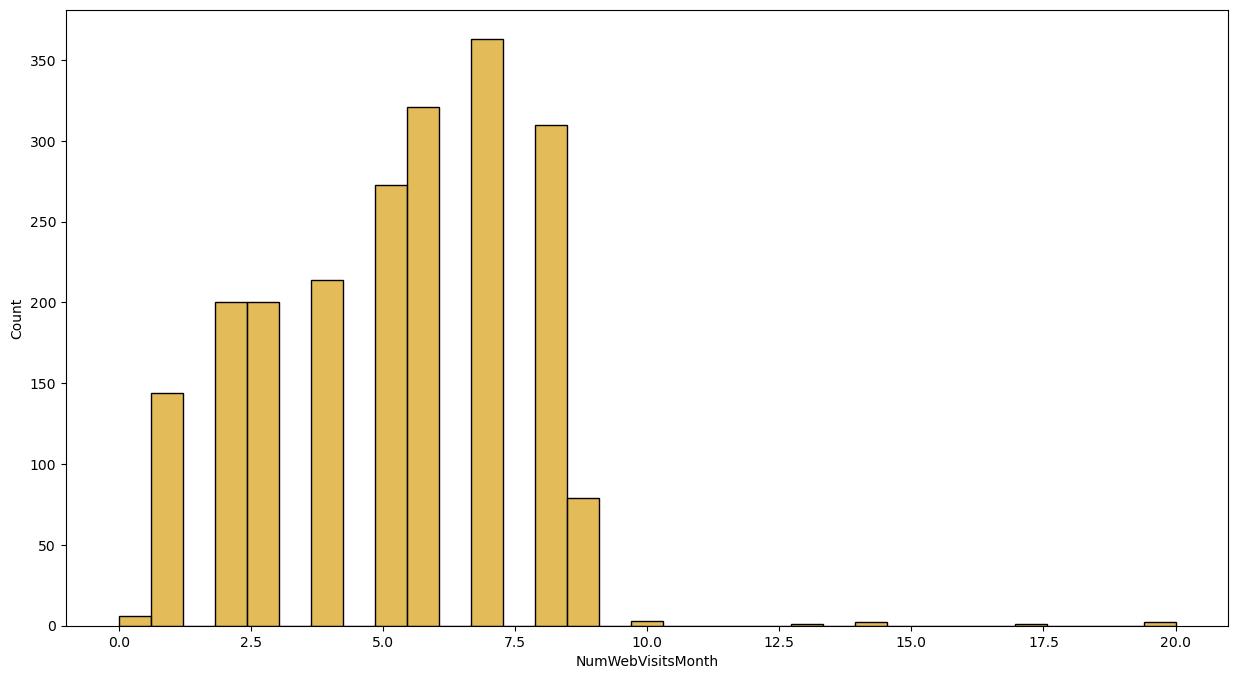

In [68]:
# Places where Products were sold
cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

for i in cols:
    sns.boxplot(data=df_customer, x=i, color="goldenrod")
    plt.show()

    sns.histplot(data=df_customer, x=i, color="goldenrod")
    plt.show()

In [70]:
# Dropping the remaining outliers

for i in cols:
    Q1 = np.percentile(df_customer[i], 25)
    Q3 = np.percentile(df_customer[i], 75)

    # calculate IQR
    IQR = Q3 - Q1
    
    # define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_customer = df_customer[(df_customer[i] >= lower_bound) & (df_customer[i] <= upper_bound)]

In [72]:
# Droping two un-wanted columns
cols = ["Z_CostContact", "Z_Revenue"]

df_customer = df_customer.drop(cols, axis=1)

df_customer

Year_Birth   Education   Income Dt_Customer  Recency  NumDealsPurchases  \
0           1957  Graduation  58138.0  2012-04-09       58                  3   
1           1954  Graduation  46344.0  2014-08-03       38                  2   
2           1965  Graduation  71613.0  2013-08-21       26                  1   
3           1984  Graduation  26646.0  2014-10-02       26                  2   
4           1981         PhD  58293.0  2014-01-19       94                  5   
...          ...         ...      ...         ...      ...                ...   
2234        1974  Graduation  34421.0  2013-01-07       81                  1   
2235        1967  Graduation  61223.0  2013-06-13       46                  2   
2237        1981  Graduation  56981.0  2014-01-25       91                  1   
2238        1956      Master  69245.0  2014-01-24        8                  2   
2239        1954         PhD  52869.0  2012-10-15       40                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2234                1                    0                  2   
2235                9                    3                  4   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0             0   
2235                  5             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Relationship  Offspring  \
0                0             0         0         1             0          0   
1                0             0         0         0             0          2   
2                0             0         0         0             1          0   
3                0             0         0         0             1          1   
4                0             0         0         0             1          1   
...            ...           ...       ...       ...           ...        ...   
2234             0             0         0         0             1          1   
2235             0             0         0         0             1          1   
2237             0             0         0         0             0          0   
2238             0             0         0         0             1          1   
2239             0             0         0         1             1          2   

      Spending  
0         1617  
1           27  
2          776  
3           53  
4          422  
...        ...  
2234        30  
2235      1341  
2237      1241  
2238       843  
2239       172  

[2093 rows x 20 columns]

In [74]:
df_customer.shape

(2093, 20)

<Axes: >

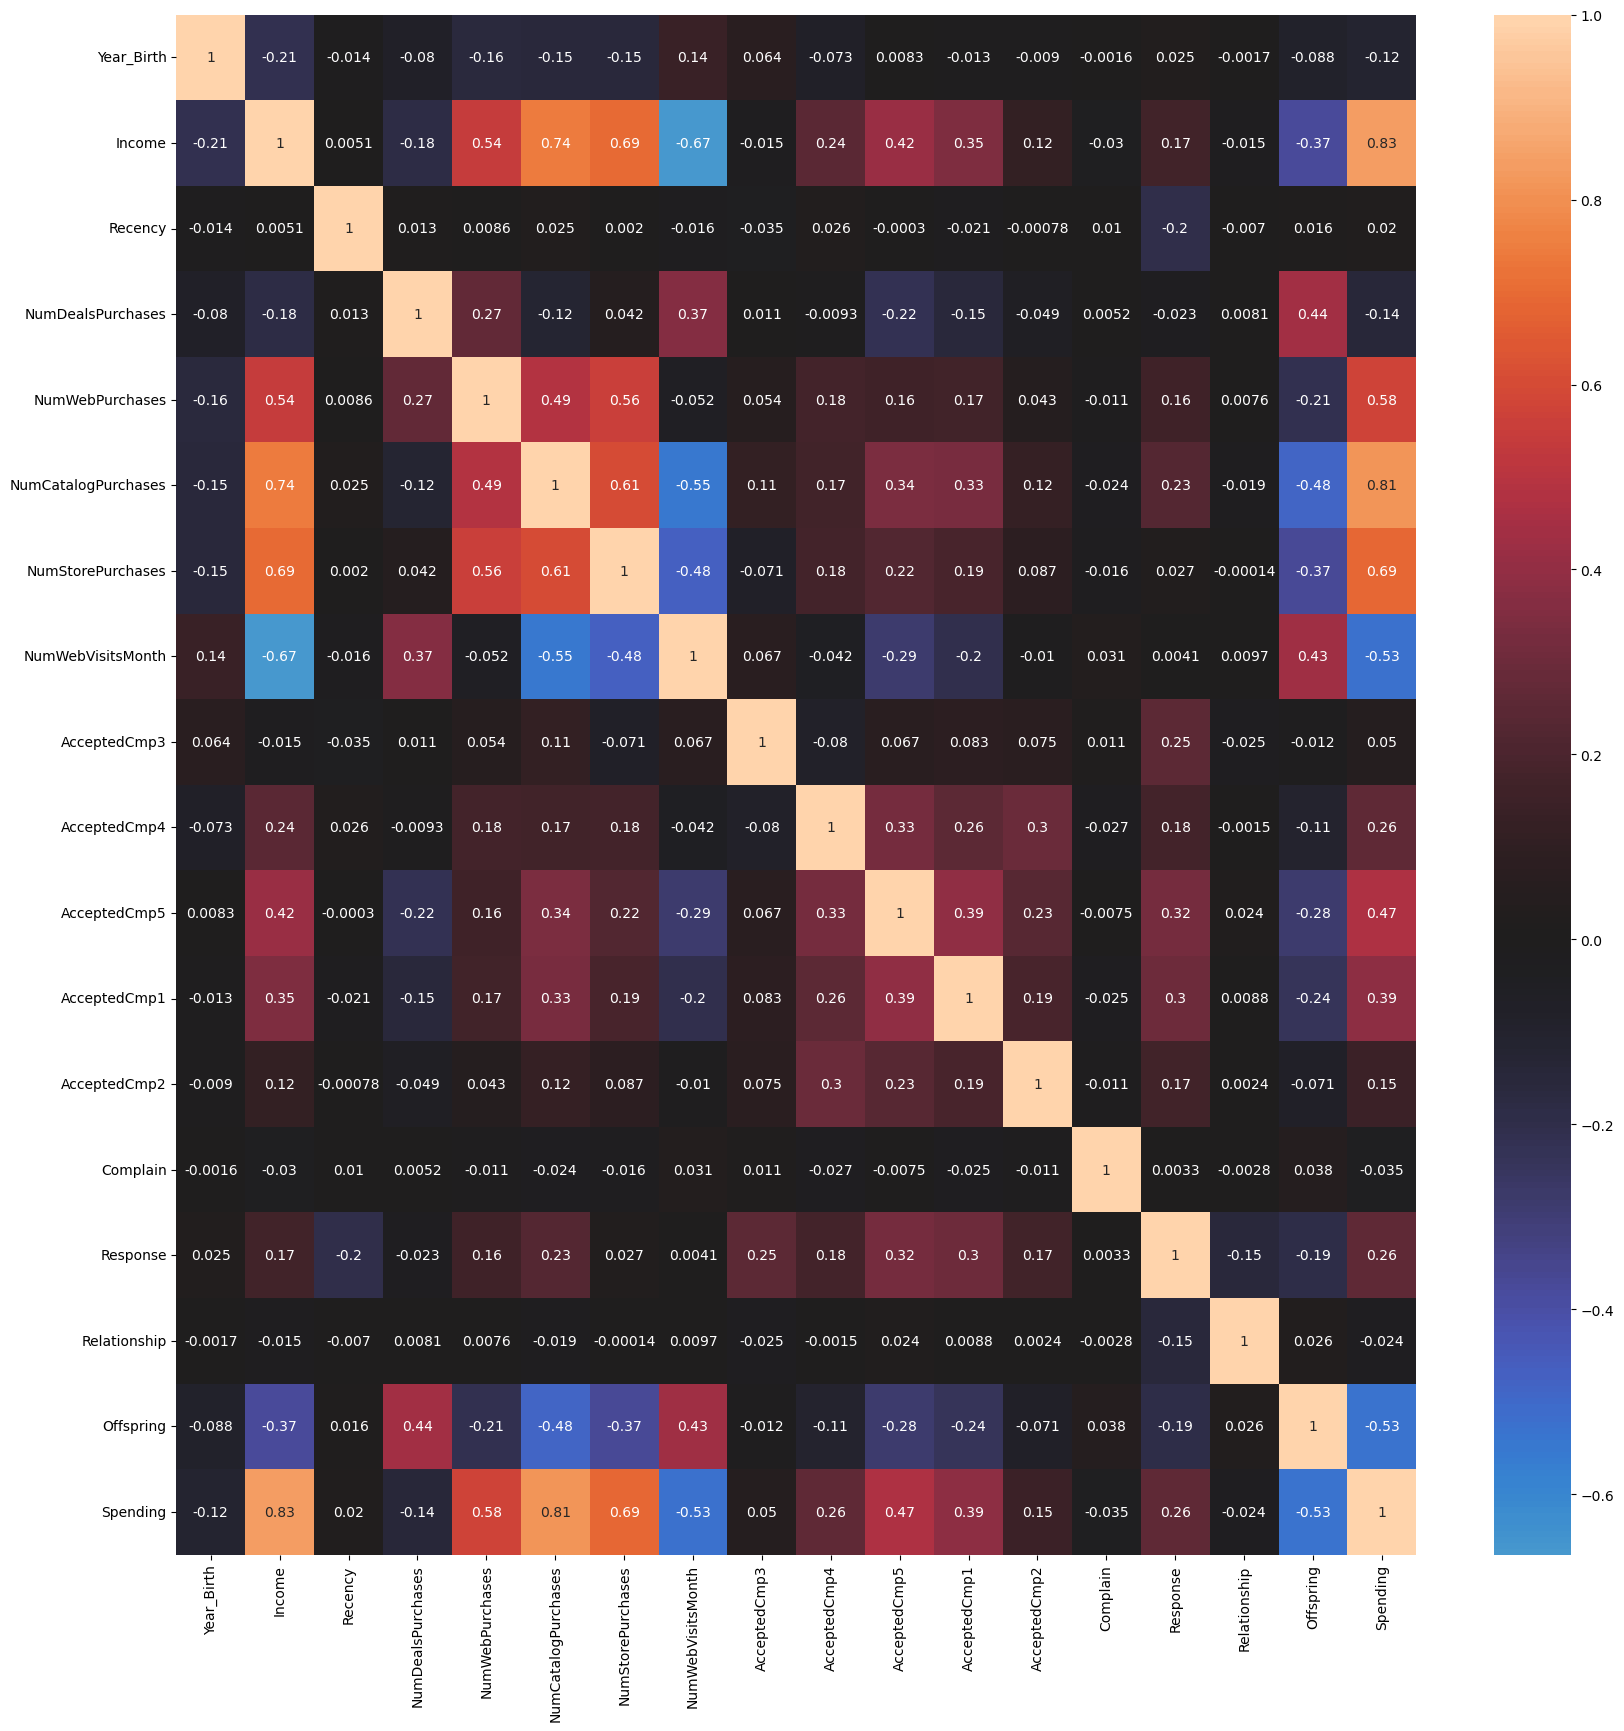

In [76]:
#correlation matrix
corrmat= df_customer.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

# Principle Analysis Component(PCA)

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
- Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

In [78]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

customers_pca = pd.DataFrame(df_customer)

# handle Datetime column before PCA

customers_pca['Year'] = customers_pca['Dt_Customer'].dt.year
customers_pca['Month'] = customers_pca['Dt_Customer'].dt.month
customers_pca['Day'] = customers_pca['Dt_Customer'].dt.day
customers_pca = customers_pca.drop('Dt_Customer', axis=1)

# handle categorical column by getting dummies
customers_pca = pd.get_dummies(customers_pca)

# Scale the data

scaler = StandardScaler()
customers_pca = scaler.fit_transform(customers_pca)


pca = PCA(n_components=3, random_state=42)
pca_data = pca.fit_transform(customers_pca)
pca_data

array([[ 2.44365623,  1.84360717,  0.66874777],
       [-1.88272383, -0.89938375, -0.66536129],
       [ 1.61712588, -0.00531017, -1.29610401],
       ...,
       [ 1.71105183, -1.44601519, -0.36054156],
       [ 1.53860751, -0.33312628, -1.9193317 ],
       [-1.06757418,  2.37341416,  1.38579508]])

# Clustering

**Steps involved in the Clustering**

- Elbow Method to determine the number of clusters to be formed
- Examining the clusters formed via scatter plot

In [80]:
# Quick examination of elbow method to find numbers of clusters to make.
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

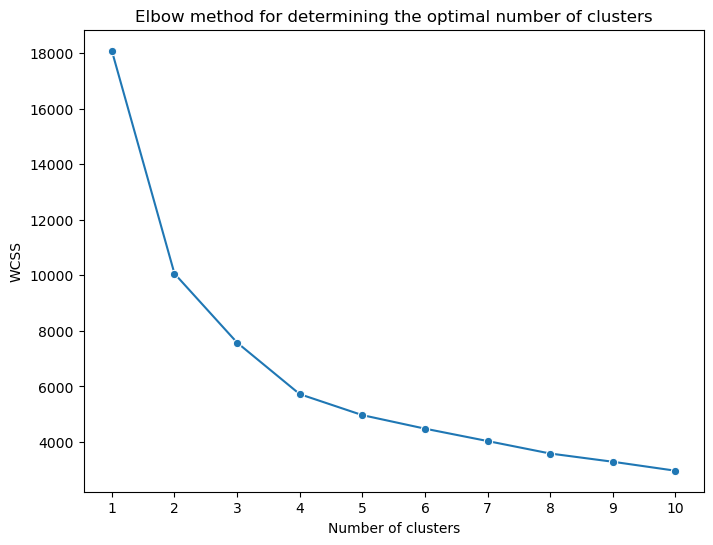

In [82]:
n_clusters_range = range(1,11)  

# Within_Cluster Sum of Square
wcss_values = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_init="auto", n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))

sns.lineplot(x=n_clusters_range, y=wcss_values, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for determining the optimal number of clusters')
plt.xticks(range(1,11)) 
plt.show()

**Based on the this Elbow Graph, I'd say the elbow point is at K=4**

## Optimal K=4

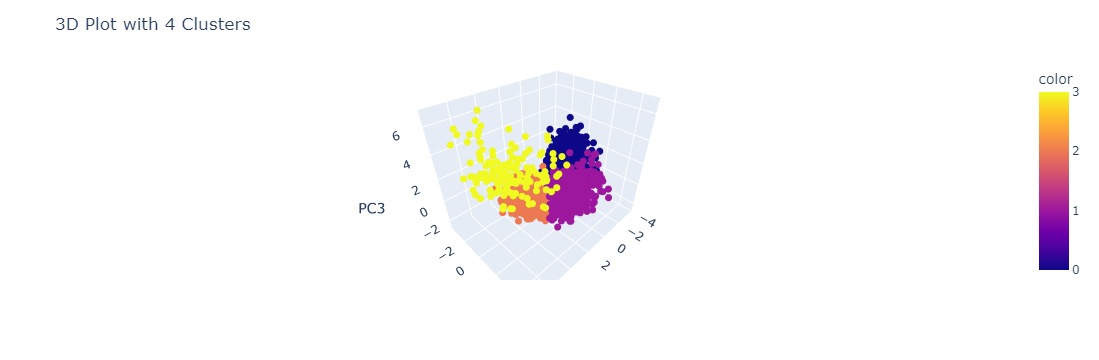

In [84]:
import plotly.express as px

kmeans_4 = KMeans(n_init="auto", n_clusters=4, random_state=42)
kmeans_4.fit(pca_data)
labels_4 = kmeans_4.labels_

#3D plot for 4 clusters
fig = px.scatter_3d(pca_data, x=pca_data[:, 0], y=pca_data[:, 1], z=pca_data[:, 2], color=labels_4)
fig.update_layout(title='3D Plot with 4 Clusters', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig.update_traces(marker=dict(size=4))
fig.show()

In [86]:
# Now we add the cluster labels to the original dataset
kmeans = KMeans(n_init="auto", n_clusters=4, random_state=42)
kmeans.fit(pca_data)

cluster_labels = kmeans.labels_

df_customer['Cluster'] = cluster_labels
df_customer

Year_Birth   Education   Income Dt_Customer  Recency  NumDealsPurchases  \
0           1957  Graduation  58138.0  2012-04-09       58                  3   
1           1954  Graduation  46344.0  2014-08-03       38                  2   
2           1965  Graduation  71613.0  2013-08-21       26                  1   
3           1984  Graduation  26646.0  2014-10-02       26                  2   
4           1981         PhD  58293.0  2014-01-19       94                  5   
...          ...         ...      ...         ...      ...                ...   
2234        1974  Graduation  34421.0  2013-01-07       81                  1   
2235        1967  Graduation  61223.0  2013-06-13       46                  2   
2237        1981  Graduation  56981.0  2014-01-25       91                  1   
2238        1956      Master  69245.0  2014-01-24        8                  2   
2239        1954         PhD  52869.0  2012-10-15       40                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2234                1                    0                  2   
2235                9                    3                  4   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  ...  AcceptedCmp2  Complain  Response  Relationship  \
0                     7  ...             0         0         1             0   
1                     5  ...             0         0         0             0   
2                     4  ...             0         0         0             1   
3                     6  ...             0         0         0             1   
4                     5  ...             0         0         0             1   
...                 ...  ...           ...       ...       ...           ...   
2234                  7  ...             0         0         0             1   
2235                  5  ...             0         0         0             1   
2237                  6  ...             0         0         0             0   
2238                  3  ...             0         0         0             1   
2239                  7  ...             0         0         1             1   

      Offspring  Spending  Year  Month  Day  Cluster  
0             0      1617  2012      4    9        1  
1             2        27  2014      8    3        0  
2             0       776  2013      8   21        2  
3             1        53  2014     10    2        0  
4             1       422  2014      1   19        1  
...         ...       ...   ...    ...  ...      ...  
2234          1        30  2013      1    7        0  
2235          1      1341  2013      6   13        1  
2237          0      1241  2014      1   25        2  
2238          1       843  2014      1   24        2  
2239          2       172  2012     10   15        1  

[2093 rows x 24 columns]

# Cluster Analysis

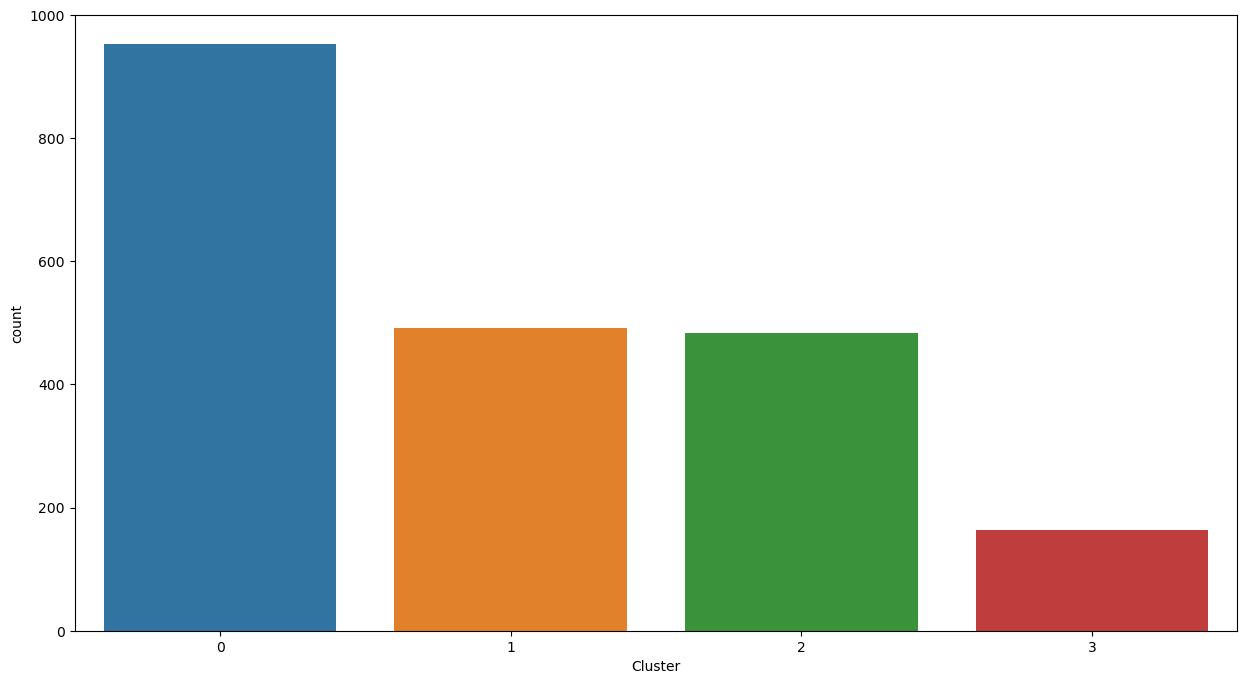

In [88]:
sns.countplot(data=df_customer, x="Cluster")
plt.show()

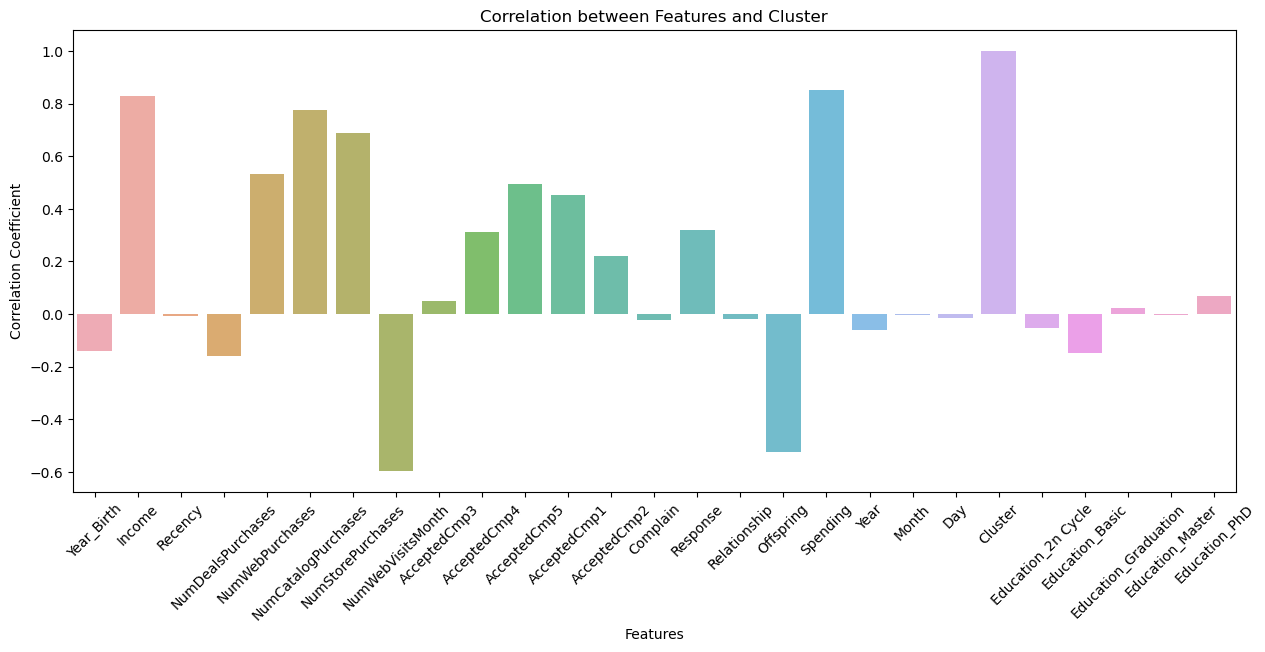

In [90]:
# Now, let us see which features make difference the most likely 
customers_corr = pd.DataFrame(df_customer)

customers_corr['Year'] = customers_corr['Dt_Customer'].dt.year
customers_corr['Month'] = customers_corr['Dt_Customer'].dt.month
customers_corr['Day'] = customers_corr['Dt_Customer'].dt.day
customers_corr = customers_corr.drop('Dt_Customer', axis=1)

# handle categorical column by getting dummies
customers_corr = pd.get_dummies(customers_corr)

# Calculate the correlation between each feature and the "Cluster" column
cluster_corr = customers_corr.corrwith(customers_corr['Cluster'])

# Create a bar plot to visualize the correlations
plt.figure(figsize=(15, 6))
sns.barplot(x=cluster_corr.index, y=cluster_corr.values, alpha=0.8)
plt.xticks(rotation=45)
plt.title('Correlation between Features and Cluster')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

**So, the important column will be kept for the further analysis**

- Income
- NumDealsPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebVisitsMonth
- Offspring
- Spending
- AcceptedCmp1
- AcceptedCmp5

In [92]:
imp_features = df_customer.loc[:, ["Income", "NumDealsPurchases", "NumCatalogPurchases",
                              "NumStorePurchases", "NumWebVisitsMonth", "Offspring",
                              "Spending", "AcceptedCmp1", "AcceptedCmp5", "Cluster"]]
imp_features.head()

Income  NumDealsPurchases  NumCatalogPurchases  NumStorePurchases  \
0  58138.0                  3                   10                  4   
1  46344.0                  2                    1                  2   
2  71613.0                  1                    2                 10   
3  26646.0                  2                    0                  4   
4  58293.0                  5                    3                  6   

   NumWebVisitsMonth  Offspring  Spending  AcceptedCmp1  AcceptedCmp5  Cluster  
0                  7          0      1617             0             0        1  
1                  5          2        27             0             0        0  
2                  4          0       776             0             0        2  
3                  6          1        53             0             0        0  
4                  5          1       422             0             0        1

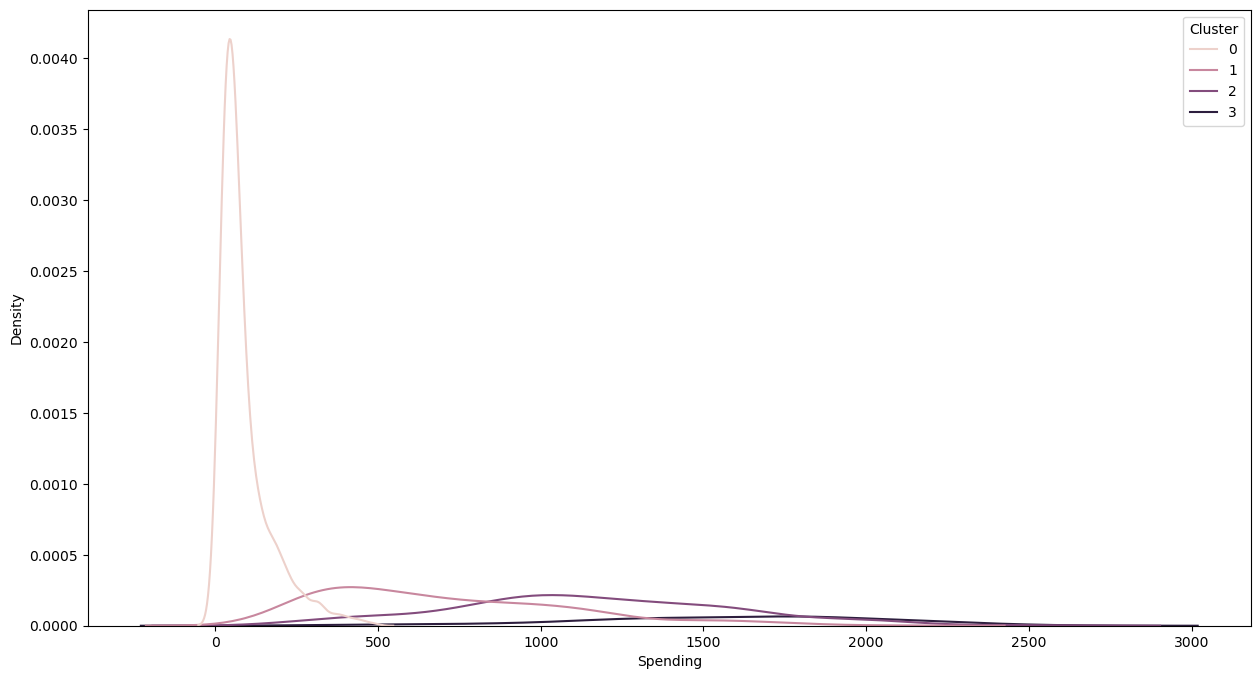

In [94]:
sns.kdeplot(data=imp_features, x="Spending", hue="Cluster")
plt.show()

**Cluster 0 is characterized by low spending, definitely a parent**

**Cluster 1 is characterized by low-medium spending**

**Cluster 2 is characterized by high spending, without any children**

**Cluster 3 is characterized by medium spending**

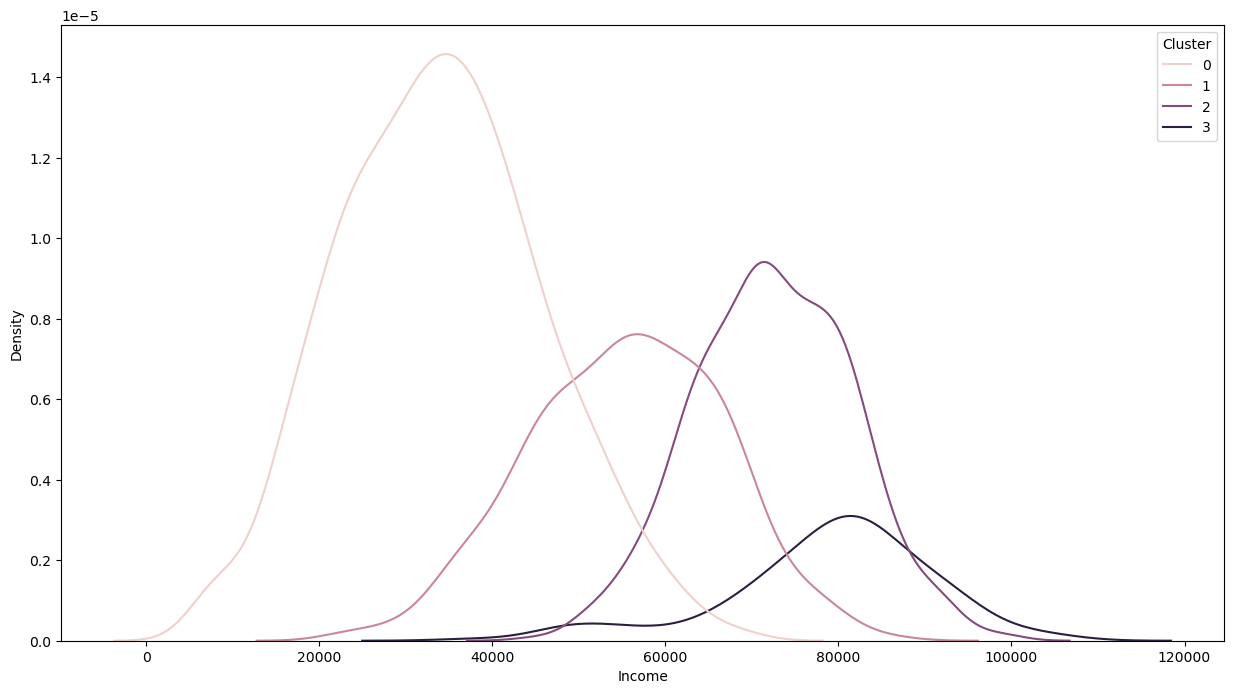

In [96]:
sns.kdeplot(data=imp_features, x="Income", hue="Cluster")
plt.show()

**Cluster 0 is mostly characterized by low income**

**Cluster 1 is mostly characterized by medium income**

**Cluster 2 is characterized by high income**

**Cluster 3 is mostly characterized by medium-high income**

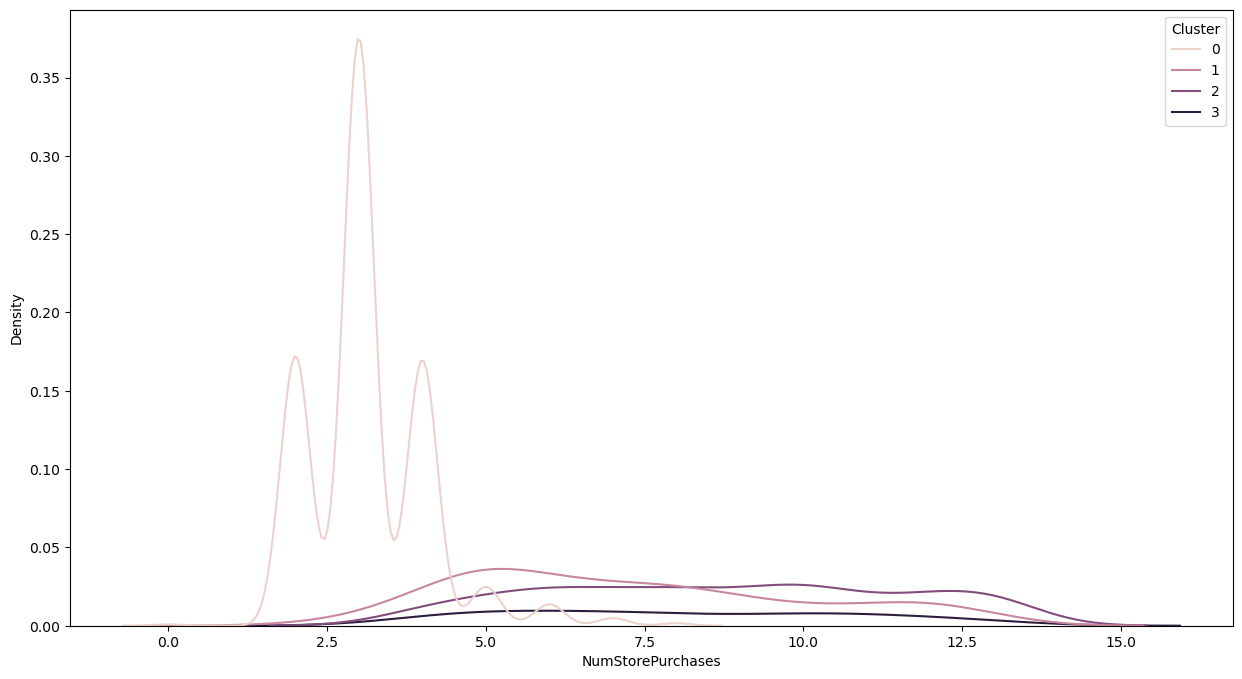

In [98]:
sns.kdeplot(data=imp_features, x="NumStorePurchases", hue="Cluster")
plt.show()

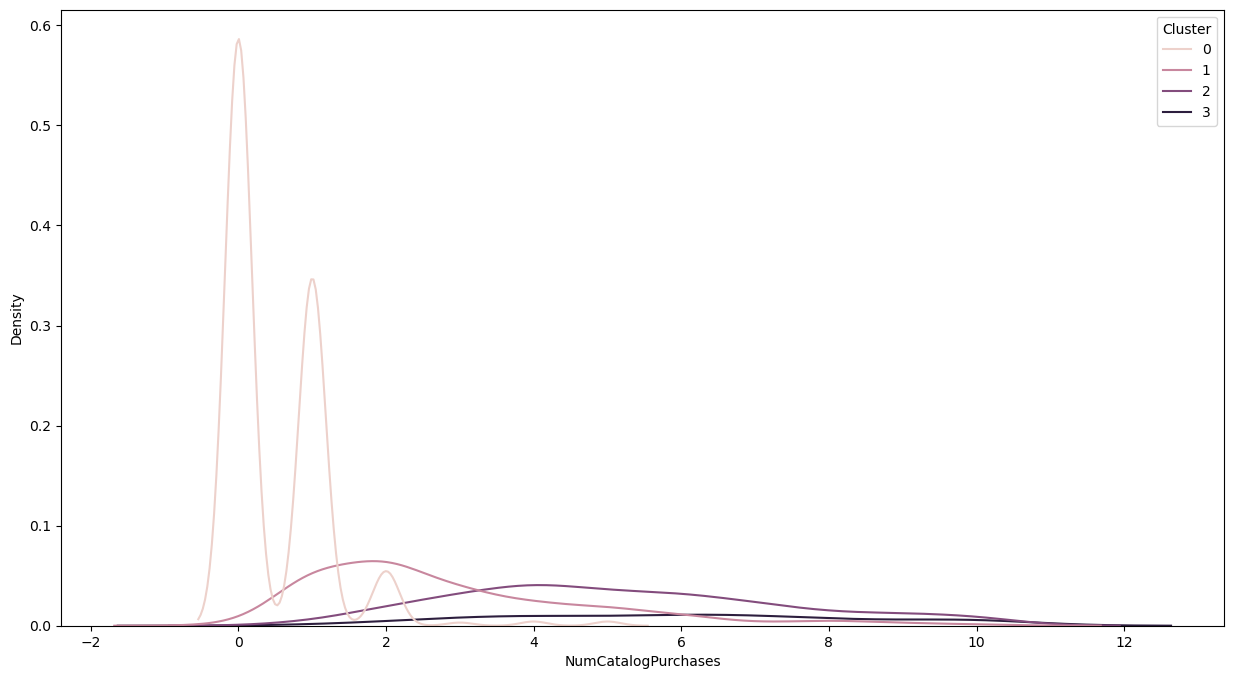

In [100]:
sns.kdeplot(data=imp_features, x="NumCatalogPurchases", hue="Cluster")
plt.show()

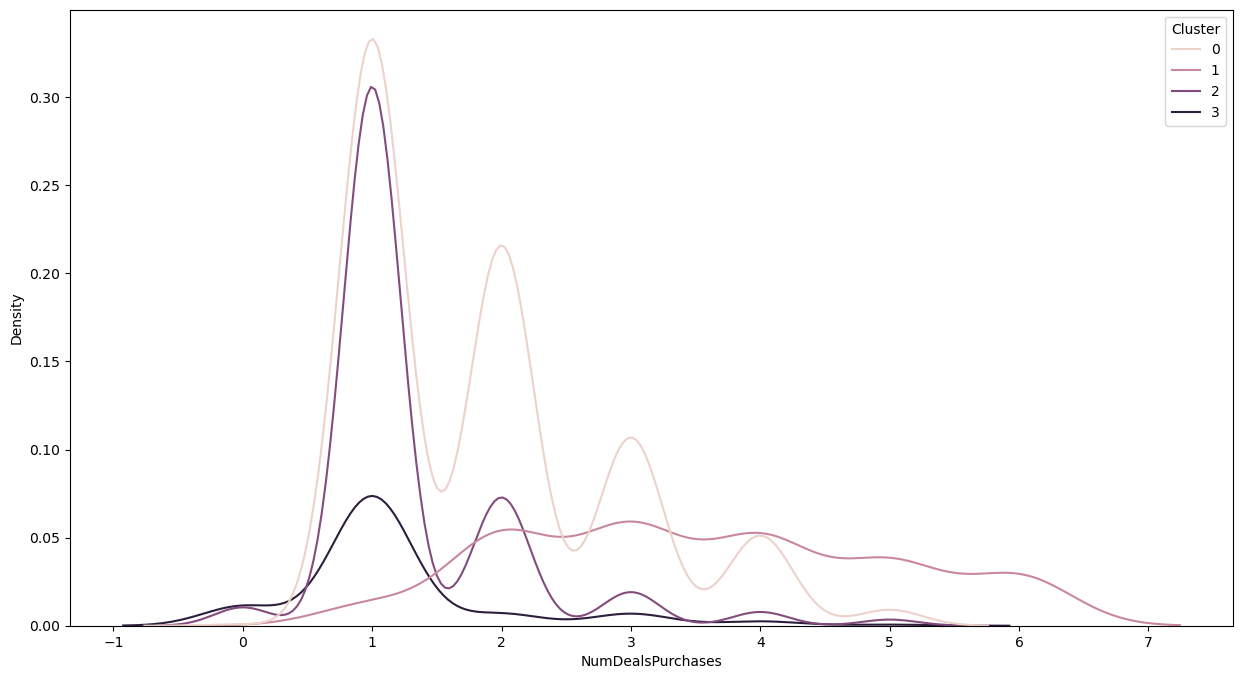

In [102]:
sns.kdeplot(data=imp_features, x="NumDealsPurchases", hue="Cluster")
plt.show()

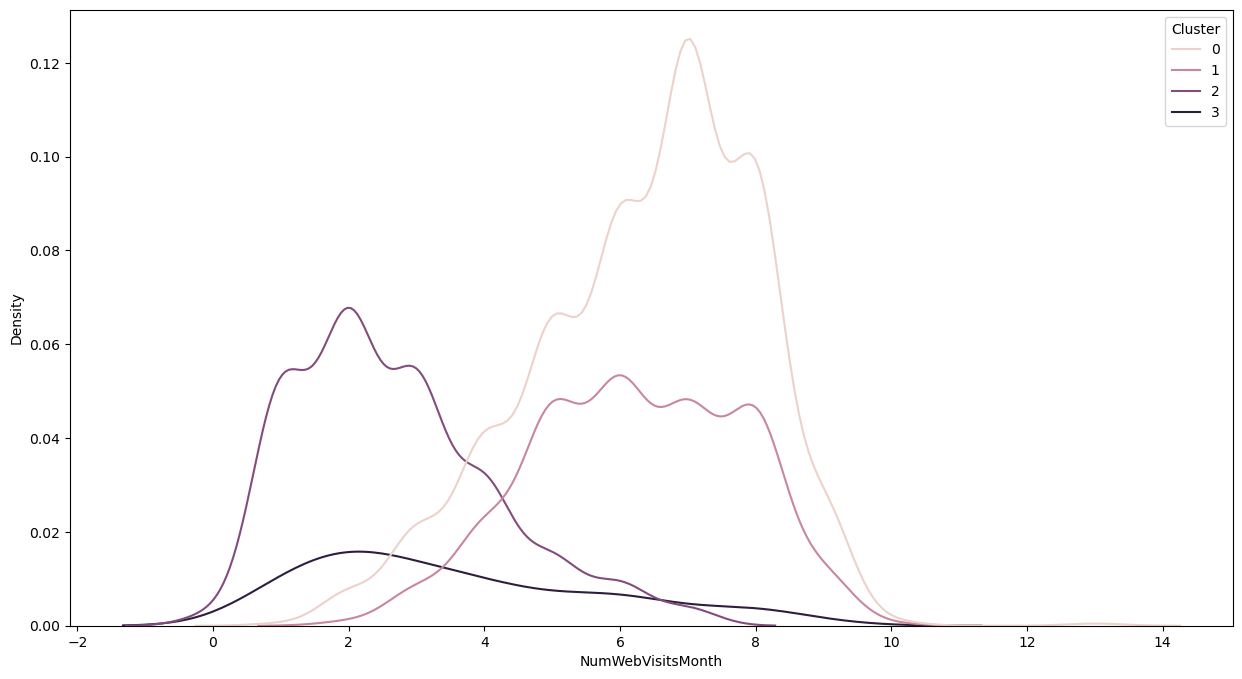

In [104]:
sns.kdeplot(data=imp_features, x="NumWebVisitsMonth", hue="Cluster")
plt.show()

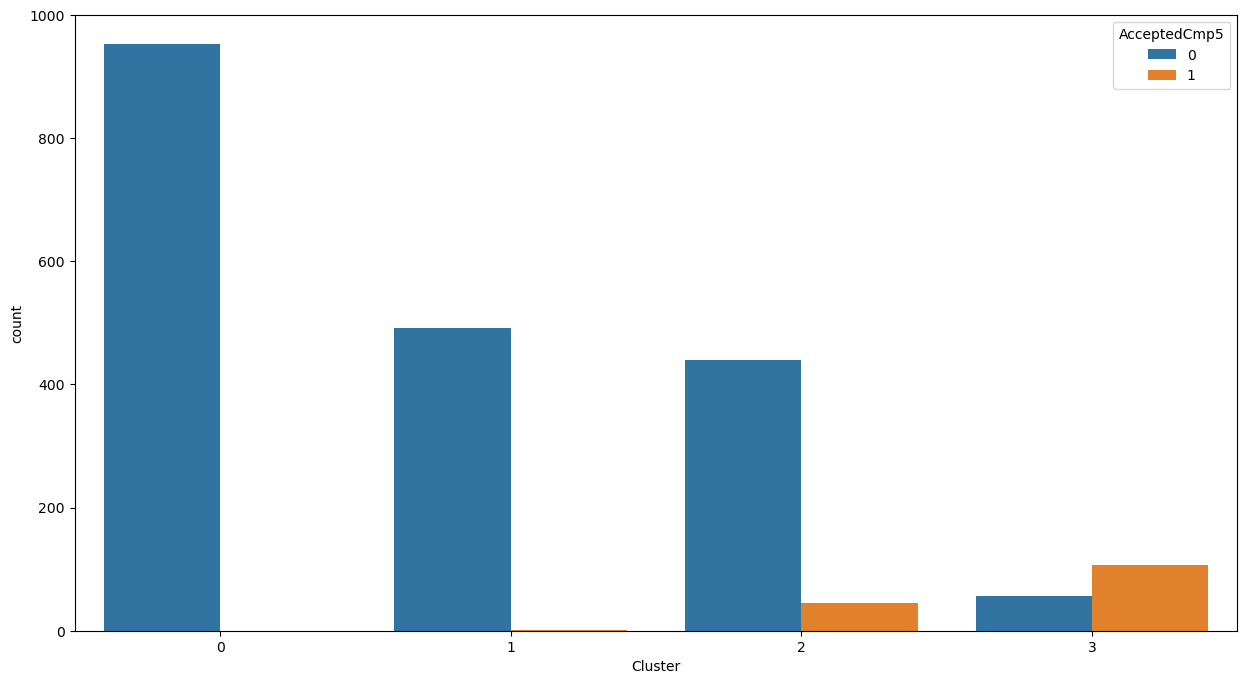

In [106]:
sns.countplot(data=imp_features, hue="AcceptedCmp5", x="Cluster")
plt.show()

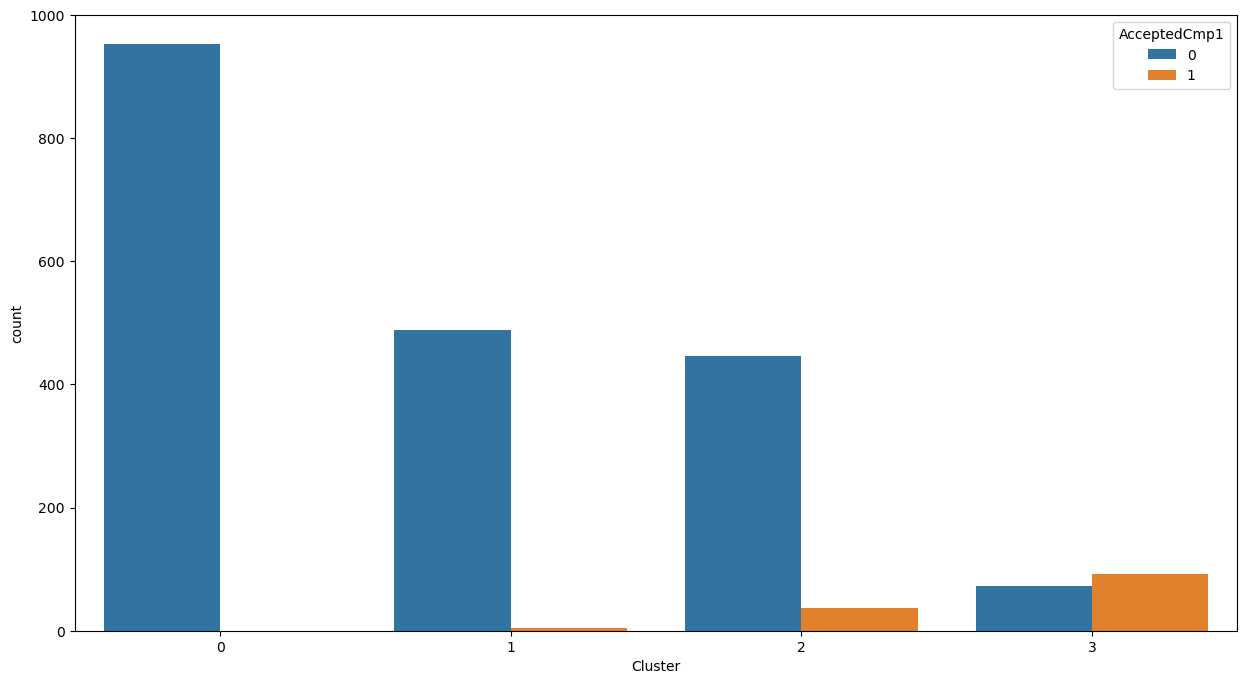

In [108]:
sns.countplot(data=imp_features, hue="AcceptedCmp1", x="Cluster")
plt.show()

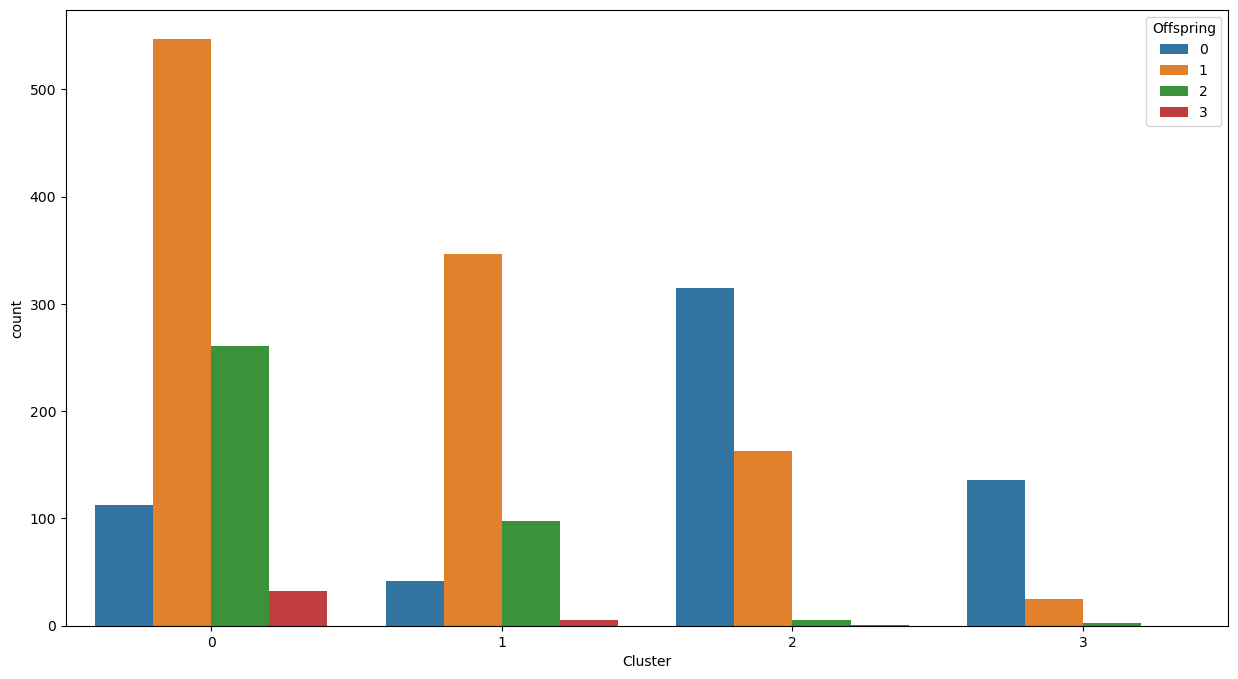

In [110]:
sns.countplot(data=imp_features, hue="Offspring", x="Cluster")
plt.show()

**Cluster 0 mostly has 1 or 2 kids**

**Cluster 1 mostly has 1 or 2 kids**

**Cluster 2 mostly has 0 or 1 kids**

**Cluster 3 mostly has 0 kids**

# Conclusion

#### Our cluster analysis revealed four distinct customer segments, each with unique characteristics. The segments are differentiated by their spending habits, income levels, and purchasing behavior.

**Segmentation Overview**

- **Frugal Families (Cluster 0)**: Low spenders with low income, characterized by fewer store and catalog purchases, frequent visits, and a higher likelihood of having 1-2 kids. They tend to reject campaigns 1 and 5.

- **Middle-Income Moderates (Cluster 1)**: Medium-low spenders with medium income, similar to Cluster 0 in terms of purchasing behavior, but with a slightly higher acceptance of campaigns.

- **High-Rolling Singles (Cluster 2)**: High spenders with high income, characterized by lower visit frequencies, a higher acceptance of campaigns 1 and 5, and a majority having 0-1 kids.

- **Aspirational Families (Cluster 3)**: Medium-high spenders with medium-high income, with purchasing behavior similar to Clusters 0 and 1, but with a lower acceptance of campaigns and a majority having 0 kids.

##### These segments provide valuable insights for targeted marketing strategies, allowing businesses to tailor their campaigns and promotions to specific customer groups.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)  

silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(pca_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters with the highest silhouette score
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

print(f"The optimal number of clusters based on silhouette score is: {optimal_n_clusters}")